In [2]:
import sys
sys.path.insert(0,'../skylens')

import tracemalloc
import pickle
from skylens import *
from survey_utils import *
from scipy.stats import norm,mode,skew,kurtosis,percentileofscore
import seaborn as sns
import importlib
reload=importlib.reload
import treecorr
d2r=np.pi/180
colors=sns.color_palette()
markers=['o','s','^','>','v']

pid:  44310 3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]


In [3]:
[[(i,j) for j in np.arange(i,3)] for i in np.arange(3)][1]

[(1, 1), (1, 2)]

In [4]:
x=np.array([ k for l in [[(i,j) for j in np.arange(i,
                                     3)] for i in np.arange(3)] for k in l])
x

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 1],
       [1, 2],
       [2, 2]])

In [5]:
logging.getLogger('matplotlib.font_manager').disabled = True

In [6]:
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [7]:
def corr_matrix(cov_mat=[]): #correlation matrix
    diag=np.diag(cov_mat)
    return cov_mat/np.sqrt(np.outer(diag,diag))

In [8]:
corr_ggl=('galaxy','shear')
corr_gg=('galaxy','galaxy')
corr_ll=('shear','shear')

In [9]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [10]:
fig_home='./figures/'

In [11]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
worker_kwargs={'memory_spill_fraction':.75,'memory_target_fraction':.99,'memory_pause_fraction':1}
LC=LocalCluster(n_workers=1,processes=False,memory_limit='60gb',threads_per_worker=2,
                local_dir='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/NGL-worker/',
               **worker_kwargs,
                #scheduler_port=12234,
#                 dashboard_address=8801
#                 diagnostics_port=8801,
#                memory_monitor_interval='2000ms')
               )
client=Client(LC,)#diagnostics_port=8801,)

#LC.close()
#client.close()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/worker.py:482: UserWarning: The local_dir keyword has moved to local_directory
  warnings.warn("The local_dir keyword has moved to local_directory")


In [12]:
outp={}
xi_sim_W={}
zs_bin={}
zl_bin={}
cl0={}
cl0_win={}
xi0={}
xi0_win={}
# l_bins={}
use_shot_noise={}

In [13]:
# fnames={0:'../tests/sims_xi_newN100_ns512_lmax1535_wlmax1535_fsky1_noSN.pkl'}
# fnames={1:'../tests/sims_xi_newN100_ns512_lmax1535_wlmax1535_fsky1_noSN_unit_window.pkl'}
# fnames={0:'../tests/sims_xi_newN100_ns512_lmax1535_wlmax1535_fsky0.3_noSN.pkl'}
# fnames[1]='../tests/sims_xi_newN100_ns512_lmax1535_wlmax1535_fsky0.3_noSN_unit_window.pkl'

home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/'
fnames={0:home+'/tests/sims_xi_newN10_ns1024_lmax3071_wlmax3071_fsky0.3_noSN.pkl'}
# fnames[1]=home+'/tests/sims_xi_newN10_ns1024_lmax3071_wlmax3071_fsky0.3_noSN_unit_window.pkl'



# if lognormal:
#     fname+='_lognormal'+str(lognormal_scale)
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'
# fname+='.pkl'

for i in fnames.keys():
    with open(fnames[i],'rb') as f:
        outp[i]=pickle.load(f)

    xi_sim_W[i]=outp[i]['simW']
    zs_bin[i]=outp[i]['zs_bin1']
    zl_bin[i]=outp[i]['zl_bin1']
    cl0[i]=outp[i]['cl0']
    cl0_win[i]=outp[i]['cl0_win']
    xi0[i]=xi_sim_W[i]['xi0']
    xi0_win[i]=xi_sim_W[i]['xiW0']
#     l_bins[i]=xi_sim_W[i]['l_bins']
    use_shot_noise[i]=xi_sim_W[i]['use_shot_noise']

In [14]:
nsim=100
corrs=[corr_ll,corr_ggl,corr_gg]

In [15]:
th_min=10./60
th_max=120./60
n_th_bins=15
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min*0.98),np.log10(1),n_th_bins*30)
th2=np.linspace(1,th_max*1.02,n_th_bins*30)
# th2=np.logspace(np.log10(1),np.log10(th_max),60*6)
th=np.unique(np.sort(np.append(th,th2)))
thb=0.5*(th_bins[1:]+th_bins[:-1])

In [16]:
labels={}
labels[corr_gg]=r'$gg$'
labels[corr_ll]=r'$\xi$'
labels[corr_ggl]=r'$g \gamma$'

corr_labels={}
corr_labels[corr_ll]=r'$\xi_+$'
corr_labels[corr_gg]=r'$gg$'
corr_labels[corr_ggl]=r'$g\gamma_t$'

corr_fnames={}
corr_fnames[corr_ll]='ll'
corr_fnames[corr_gg]='gg'
corr_fnames[corr_ggl]='ggl'




In [17]:
f_sky=0.3

('shear', 'shear') 0 0
0 [0.96473047 0.95693165 0.95688367 0.95598464 0.96446265 0.96720741
 0.96746621 0.96869122 0.97089191 0.97291931 0.97750912 0.97065736
 0.96033294 0.95480935 0.94351477]
15 [ 0.9198444   0.94947624  1.17666777  1.41814633 -0.55436472  0.96452081
  0.96017271  0.94682091  0.9499719   0.95683153  0.95471839  0.9509613
  0.95141802  0.9517532   0.95086154]
('galaxy', 'shear') 1 0
30 [0.95103558 0.95069133 0.95801822 0.96461042 0.96678574 0.9672791
 0.97566735 0.97696435 0.95610778 0.96144247 0.97338618 0.9682241
 0.97114597 0.98070515 0.973342  ]
('galaxy', 'galaxy') 2 0
45 [0.97160774 0.97610429 0.97660745 0.9748788  0.97386685 0.97550679
 0.98453509 0.98087246 0.97393734 1.00174873 1.02772786 1.04123285
 0.98236654 0.94803358 0.90149405]


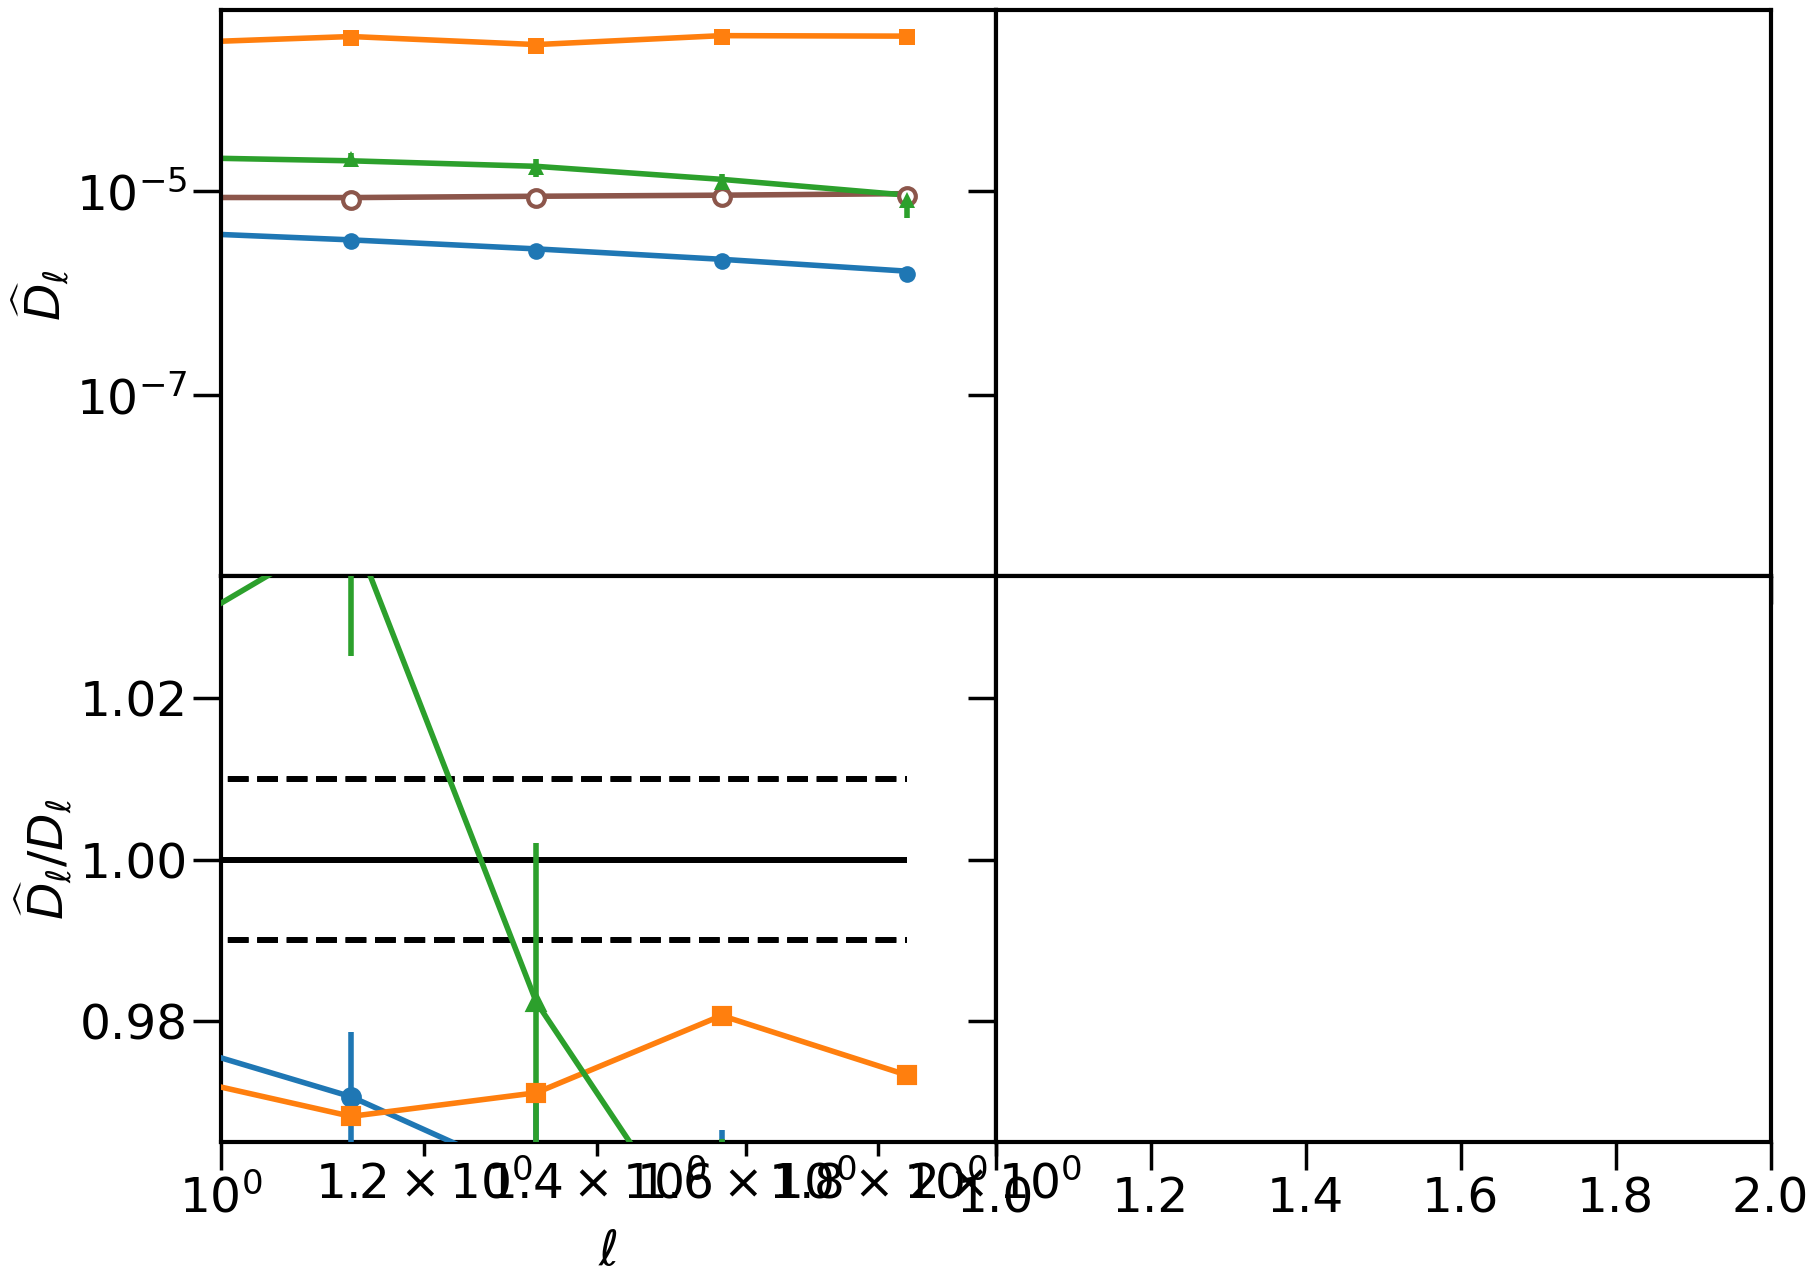

In [18]:
f=1
corr_i=0
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
# ax=ax.reshape(2,1)
i_n=len(thb)
for simj in np.arange(1):
    corr_i=0
    i_s=0
    for corr in corrs:
        color=colors[corr_i]
        marker=markers[corr_i]
        print(corr,corr_i,simj)
#     if corr==corr_gg:
#         i_s+=i_n
#         continue
        xi_simi=xi_sim_W[simj]
#         else:
#             xi_simi=xi_sim_Ww
        pS=ax[0,simj]
        pR=ax[1,simj]
#         f=np.array([thb]*4).flatten()
        f=thb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(thb,f*xi_simi['xi0']['xi'][i_s:i_s+i_n],c=color)

#         f=1./xi_simi['xiW0']['xi'][i_s:i_s+i_n]/f_sky
        f=1./xi_simi['xi0']['xi'][i_s:i_s+i_n]
        f2=f/sqrt(nsim)
        pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        i_s+=i_n
        if corr==corr_ll:
            f=thb
            pS.errorbar(thb*1.0,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                        fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$^{BB}$')
            pS.plot(thb,f*xi_simi['xi0']['xi'][i_s:i_s+i_n],c=colors[5])
#             f=1./xi_simi['xiW0']['xi'][i_s:i_s+i_n]/f_sky
            f=1./xi_simi['xi0']['xi'][i_s:i_s+i_n]
            f2=f/sqrt(nsim)
            pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',mfc='white',mew=3,c=colors[5],zorder=10)
            print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            i_s+=i_n


        pR.set_xscale('log')
        # yscale('log')
#         pR.set_ylim(.95,1.08)
#         pR.hlines(1,10,3000)
#         pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
#         pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
#         pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_ylim(.965,1.0351)
        pR.set_xlabel(r'$\ell$')
        pR.hlines(1,thb.min(),thb.max(),'k')
        pR.hlines(.99,thb.min(),thb.max(),'k',ls='--')
        pR.hlines(1.01,thb.min(),thb.max(),'k',ls='--')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        corr_i+=1
# ax[0,1].legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
# ax[0,0].set_yticks(np.logspace(-10,-4,7))
ax[0,0].set_xlim(1,2)
ax[0,1].set_xlim(1,2)
# # fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'


# fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
show()

In [19]:
xi_sim_W[0]['xi_window_norm']

{'full': {('shear',
   'shear'): array([0.82365846, 0.81562198, 0.82096172, 0.81514377, 0.8159397 ,
         0.8149905 , 0.81386065, 0.81328483, 0.81284683, 0.81241098,
         0.81228116, 0.81210189, 0.81201781, 0.81197155, 0.81188973,
         0.81190907, 0.81195453, 0.81193096, 0.81183018, 0.81178362]),
  ('galaxy',
   'shear'): array([0.85307825, 0.85282165, 0.85282289, 0.85285147, 0.8528587 ,
         0.85281036, 0.852933  , 0.85284195, 0.85298324, 0.85297062,
         0.85294196, 0.85294206, 0.8529297 , 0.8528912 , 0.85286464,
         0.85289486, 0.85295652, 0.85298403, 0.85285644, 0.85278658]),
  ('galaxy',
   'galaxy'): array([0.92017335, 0.90590369, 0.91637619, 0.90513233, 0.90677937,
         0.90453363, 0.90222921, 0.90092556, 0.89967833, 0.89861046,
         0.89780509, 0.89703183, 0.89649794, 0.89613469, 0.8959822 ,
         0.89594615, 0.89581891, 0.89582753, 0.89588666, 0.8958157 ])}}

In [20]:
nside=1024
lmax_cl=3*nside-1
window_lmax=3*nside-1
Nl_bins=37 #40
l0w=np.arange(3*nside-1)

In [21]:
#setup parameters
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
# l_bins=np.int64(np.linspace(lmin_cl_Bins,lmax_cl_Bins,Nl_bins))
lb=(l_bins[1:]+l_bins[:-1])*.5

l=np.int32(l0) #np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False

do_xi=True

In [22]:
use_window=True
f_sky=0.3
n_source_bins=1
sigma_gamma=0.3944/sqrt(2.)  #*2**0.25

In [23]:
store_win=True
unit_window=False
smooth_window=False

In [24]:
w_smooth_lmax=1.e7 #some large number
if smooth_window:
    w_smooth_lmax=1000
window_cl_fact=np.cos(np.pi/2*(l0w/w_smooth_lmax)**10)
x=window_cl_fact<0
x+=l0w>w_smooth_lmax
window_cl_fact[x]=0
if unit_window:
    window_cl_fact=0

In [25]:
do_cov=True
store_win=True

In [26]:
wigner_files={}
wigner_files[0]= '/home/deep/data/repos/SkyLens/temp/dask_wig3j_l6500_w2100_0_reorder.zarr'
wigner_files[2]= '/home/deep/data/repos/SkyLens/temp/dask_wig3j_l3500_w2100_2_reorder.zarr'


In [27]:
corrs=[corr_ll,corr_ggl,corr_gg]

In [28]:
bin_xi=True

# HT_kwargs={'l_min':l_min,  'l_max':l_max,
#                         'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
#                         'n_zeros':40000, 'prune_theta':prune_theta, 'm1_m2':[(2,2),(2,-2),(0,2),(0,0)]}
l0_win=np.arange(lmax_cl)
WT_L_kwargs={'l': l0_win,'theta': th*d2r,'s1_s2':[(2,2),(2,-2),(0,2),(2,0),(0,0)]}
WT_L=None
if do_xi:
    %time WT_L=wigner_transform(**WT_L_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide


CPU times: user 1.3 s, sys: 5.66 s, total: 6.96 s
Wall time: 11.8 s


(0.001, 1000.0)

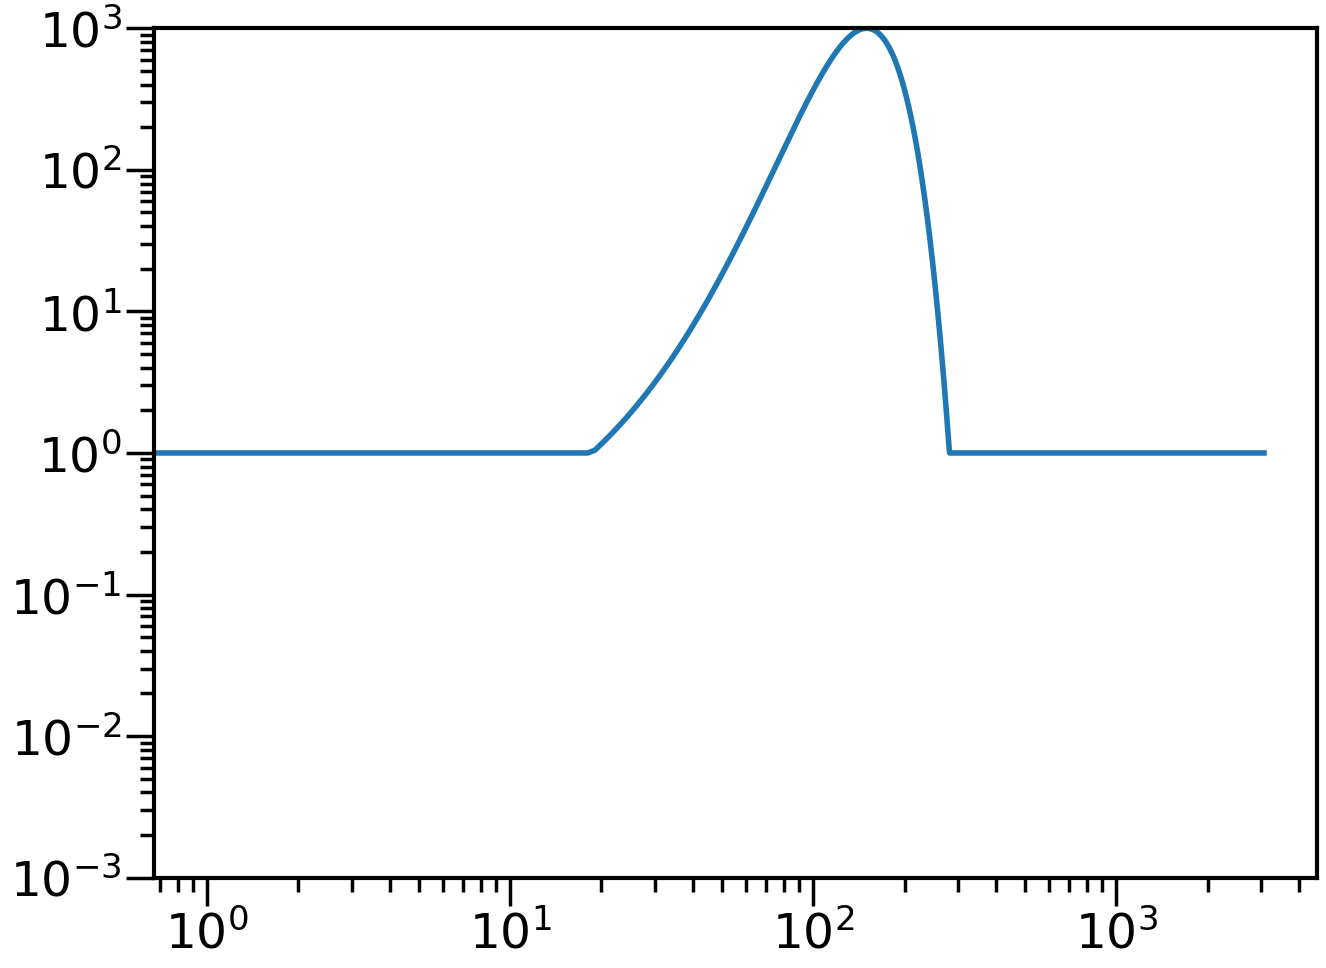

In [29]:
# l0w=np.arange(512)+1
mean=150
sigma=50
ww=1000*np.exp(-(l0w-mean)**2/sigma**2)
x=ww<1
ww[x]=1
# x=l0w>mean+3*sigma
# ww[x]=ww[l0w==mean+3*sigma]
loglog(l0w,ww*window_cl_fact)
ylim(1.e-3,1e3)

In [30]:
bi=(0,0)
use_binned_l=False

In [31]:
tracemalloc.clear_traces()
tracemalloc.start()

kappa_win={}
t1=time.time()
for i in zs_bin.keys():
    kappa_win[i]=Skylens(zs_bins=zs_bin[i],do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin[i],
            use_window=use_window,store_win=store_win,window_lmax=window_lmax,corrs=corrs,
            SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
            WT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,do_pseudo_cl=False,
                  wigner_files=wigner_files,use_binned_l=False,xi_win_approx=True
#                  Win=kappa_win.Win.Win
                 )
    client.restart()
    t2=time.time()
    print('W done',t2-t1)

# kappa_win_binned=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin1,
#             use_window=use_window,store_win=store_win,window_lmax=window_lmax,corrs=corrs,
#             SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
#             WT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,
#                   wigner_files=wigner_files,use_binned_l=True,
# #                  Win=kappa_win.Win.Win
#                  )



/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:74: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide


Win gen: step size 13 False True 3071 3072.0
cl bags done 3 6 261.45284247398376
Got xi win graph Delayed('combine_coupling_xi_cov-223b3d2a-3209-49e2-85eb-cd9b70600b23') dask.bag<get_window_power_cl, npartitions=3> dask.bag<get_window_power_cov, npartitions=6>
Window done. Size: 4.673573
W done 438.3113353252411


In [32]:
# clG_win={}
# cl0_win={}
# for i in zs_bin.keys():
#     %time clG_win[i]=kappa_win[i].cl_tomo(corrs=corrs) 
#     %time cl0_win[i]=clG_win[i]['stack'].compute()

xiG_win={}
xi_win={}

if do_xi:
    for i in zs_bin.keys():
        %time xiG_win[i]=kappa_win[i].xi_tomo()
        %time xi_win[i]=xiG_win[i]['stack'].compute()

KeyError: 'shear_m_bias'

KeyError: 0

In [33]:
do_xi

True

In [ ]:
kappa0=Skylens(zs_bins=zs_bin[0],do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin[0],
            use_window=False,store_win=store_win,corrs=corrs,window_lmax=window_lmax,
            SSV_cov=True,tidal_SSV_cov=True,f_sky=f_sky,use_binned_l=False,do_pseudo_cl=False,
            WT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,xi_win_approx=True)

%time clG0=kappa0.cl_tomo(corrs=corrs) 
%time cl0=clG0['stack'].compute()

if do_xi:
    %time xiG_L0=kappa0.xi_tomo()
    %time xi_L0=xiG_L0['stack'].compute()

In [ ]:
nsim=1000
# if test_run:
#     nsim=10
lognormal=False
lognormal_scale=2

In [ ]:
corrs=[corr_ll,corr_ggl,corr_gg]

In [ ]:
xi_simi.keys()

In [ ]:
f=1
corr_i=0
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ax=ax.reshape(2,1)
i_s=0
i_n=len(thb)
th_key='xiW0'
for corr in corrs:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
#     if corr==corr_gg:
#         i_s+=i_n
#         continue
    for simj in np.arange(1):
        xi_simi=xi_sim_W[simj]
#         else:
#             xi_simi=xi_sim_Ww
        pS=ax[0,simj]
        pR=ax[1,simj]
#         f=np.array([thb]*4).flatten()
        f=thb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(thb,f*xi_simi[th_key]['xi'][i_s:i_s+i_n],c=color)

        f=1./xi_simi[th_key]['xi'][i_s:i_s+i_n]#/0.3
        f2=f/sqrt(nsim)
        pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        print(i_s,xi_simi['xiW0']['xi'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        i_s+=i_n
        if corr==corr_ll:
            f=thb
            pS.errorbar(thb*1.0,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                        fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$^{BB}$')
            pS.plot(thb,f*xi_simi[th_key]['xi'][i_s:i_s+i_n],c=colors[5])
            f=1./xi_simi[th_key]['xi'][i_s:i_s+i_n]#/0.3
            f2=f/sqrt(nsim)
            pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',mfc='white',mew=3,c=colors[5],zorder=10)
            print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            print(i_s,xi_simi['xiW0']['xi'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            i_s+=i_n


        pR.set_xscale('log')
        # yscale('log')
#         pR.set_ylim(.95,1.08)
#         pR.hlines(1,10,3000)
#         pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
#         pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
#         pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_ylim(.95,1.051)
        pR.set_xlabel(r'$\ell$')
        pR.hlines(1,thb.min(),thb.max(),'k')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
# ax[0,1].legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
# ax[0,0].set_yticks(np.logspace(-10,-4,7))
# # fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'


# fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
show()

In [ ]:
xi_simi.keys()

In [ ]:
zs_bin[1].keys()

In [ ]:
x=zs_bin[0][0]['window']>-1.e15
zs_bin[0][0]['window'][x].mean()

In [ ]:
x=zl_bin[0][0]['window']>-1.e15
zl_bin[0][0]['window'][x].mean()

In [ ]:
hp.mollview(zs_bin[0][0]['window'])

In [ ]:
cls=hp.anafast(zs_bin[0][0]['window'])
cll=hp.anafast(zl_bin[0][0]['window'])

In [ ]:
plot(cls)
loglog()

In [ ]:
xi_simi['xi_window_norm']['full']

In [ ]:
f=1
corr_i=0
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ax=ax.reshape(2,1)
i_s=0
i_n=len(thb)
th_key='xiW0'
for corr in corrs:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
#     if corr==corr_gg:
#         i_s+=i_n
#         continue
    for simj in np.arange(1):
        xi_simi=xi_sim_W[simj]
#         else:
#             xi_simi=xi_sim_Ww
        pS=ax[0,simj]
        pR=ax[1,simj]
#         f=np.array([thb]*4).flatten()
        f=thb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(thb,f*np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n],c=color)

        f=1./np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n]#/0.3
        f2=f/sqrt(nsim)
        pR.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        i_s+=i_n
        if corr==corr_ll:
            f=thb
            pS.errorbar(thb*1.0,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                        fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$^{BB}$')
            pS.plot(thb,f*np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n],c=colors[5])
            f=1./np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n]#/0.3
            f2=f/sqrt(nsim)
            pR.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker+'-',mfc='white',mew=3,c=colors[5],zorder=10)
            print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            i_s+=i_n


        pR.set_xscale('log')
        # yscale('log')
#         pR.set_ylim(.95,1.08)
#         pR.hlines(1,10,3000)
#         pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
#         pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
#         pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_ylim(.9,1.1)
        pR.set_xlabel(r'$\theta$(degrees)')
        pR.hlines(1,thb.min(),thb.max(),'k',zorder=-10)
        pR.hlines(1.01,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        pR.hlines(.99,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        if simj==0:
            pR.set_ylabel(r'$\widehat{\delta \xi}/\delta\xi$')
            pS.set_ylabel(r'$\widehat{\delta\xi}$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
# ax[0,1].legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
# ax[0,0].set_yticks(np.logspace(-10,-4,7))
# # fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'


# fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
# show()

In [ ]:
f=1
corr_i=0
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ax=ax.reshape(2,1)
i_s=0
i_n=len(thb)
th_key='xi0'
for corr in corrs:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
#     if corr==corr_gg:
#         i_s+=i_n
#         continue
    for simj in np.arange(1):
        xi_simi=xi_sim_W[simj+1]
#         else:
#             xi_simi=xi_sim_Ww
        pS=ax[0,simj]
        pR=ax[1,simj]
#         f=np.array([thb]*4).flatten()
        f=thb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(thb,f*xi_simi[th_key]['xi'][i_s:i_s+i_n],c=color)

        f=1./xi_simi[th_key]['xi'][i_s:i_s+i_n]#/0.3
        f2=f/sqrt(nsim)
        pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        i_s+=i_n
        if corr==corr_ll:
            f=thb
            pS.errorbar(thb*1.0,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                        fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$_-$')
            pS.plot(thb,f*xi_simi[th_key]['xi'][i_s:i_s+i_n],c=colors[5])
            f=1./xi_simi[th_key]['xi'][i_s:i_s+i_n]#/0.3
            f2=f/sqrt(nsim)
            pR.errorbar(thb,f*xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],
                    fmt=marker+'-',mfc='white',mew=3,c=colors[5],zorder=10)
            print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            i_s+=i_n


        pR.set_xscale('log')
        # yscale('log')
#         pR.set_ylim(.95,1.08)
#         pR.hlines(1,10,3000)
#         pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
#         pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
#         pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_ylim(.95,1.051)
        pR.set_xlabel(r'$\theta$ (degrees)')
        pR.hlines(1,thb.min(),thb.max(),'k',zorder=-10)
        pR.hlines(1.01,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        pR.hlines(.99,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        if simj==0:
            pR.set_ylabel(r'$\widehat{\xi}/\xi$')
            pS.set_ylabel(r'$\widehat{\xi}$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
pS.legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
# ax[0,0].set_yticks(np.logspace(-10,-4,7))
# # fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'


# fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
show()

In [ ]:
xi_simi['xiW0']['xi']/xi_simi['xi0']['xi']

In [ ]:
f=1
corr_i=0
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ax=ax.reshape(2,1)
i_s=0
i_n=len(thb)
th_key='xiW0'
for corr in corrs:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
#     if corr==corr_gg:
#         i_s+=i_n
#         continue
    for simj in np.arange(1):
        xi_simi=xi_sim_W[simj+1]
#         else:
#             xi_simi=xi_sim_Ww
        pS=ax[0,simj]
        pR=ax[1,simj]
#         f=np.array([thb]*4).flatten()
        f=thb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(thb,f*np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n],c=color)

        f=1./np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n]#/0.3
        f2=f/sqrt(nsim)
        pR.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
        i_s+=i_n
        if corr==corr_ll:
            f=thb
            pS.errorbar(thb*1.0,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                        fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$^{BB}$')
            pS.plot(thb,f*np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n],c=colors[5])
            f=1./np.sqrt(np.diag(xi_simi[th_key]['cov']))[i_s:i_s+i_n]#/0.3
            f2=f/sqrt(nsim)
            pR.errorbar(thb,f*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n],f2*xi_simi['xi_b_stats']['std'][i_s:i_s+i_n]*0,
                    fmt=marker+'-',mfc='white',mew=3,c=colors[5],zorder=10)
            print(i_s,xi_simi['xi_b_stats']['mean'][i_s:i_s+i_n]/xi_simi['xi0']['xi'][i_s:i_s+i_n])
            i_s+=i_n


        pR.set_xscale('log')
        # yscale('log')
#         pR.set_ylim(.95,1.08)
#         pR.hlines(1,10,3000)
#         pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
#         pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
#         pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_ylim(.9,1.1)
        pR.set_xlabel(r'$\theta$(degrees)')
        pR.hlines(1,thb.min(),thb.max(),'k',zorder=-10)
        pR.hlines(1.01,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        pR.hlines(.99,thb.min(),thb.max(),'k',ls='--',zorder=-10)
        if simj==0:
            pR.set_ylabel(r'$\widehat{\delta \xi}/\delta\xi$')
            pS.set_ylabel(r'$\widehat{\delta\xi}$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=2,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
# ax[0,1].legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
# ax[0,0].set_yticks(np.logspace(-10,-4,7))
# # fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
# if not use_shot_noise:
#     fname+='_noSN'
# if unit_window:
#     fname+='_unit_window'
# if smooth_window:
#     fname+='_smooth_window'


# fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
show()

In [29]:
corr_config = {'min_sep':th_min*60, 'max_sep':th_max*60, 'nbins':n_th_bins, 'sep_units':'arcmin','metric':'Arc','bin_slop':False}
def get_treecorr_cat_args(maps,masks=None):
    tree_cat_args={}
    if masks is None:
        masks={}
        for tracer in maps.keys():
            masks[tracer]=maps[tracer]==hp.UNSEEN
    for tracer in maps.keys():
        seen_indices = np.where( ~masks[tracer] )[0]
        theta, phi = hp.pix2ang(nside, seen_indices)
        ra = np.degrees(np.pi*2.-phi)
        dec = -np.degrees(theta-np.pi/2.)
        tree_cat_args[tracer] = {'ra':ra, 'dec':dec, 'ra_units':'degrees', 'dec_units':'degrees'}
    return tree_cat_args
def get_xi(map,window_norm,mask=None):
    
    maps={'galaxy':map[0]}
    maps['shear']={0:map[1],1:map[2]}
    if mask is None:
        mask={}
        mask['galaxy']=maps['galaxy']==hp.UNSEEN
        mask['shear']=maps['shear'][0]==hp.UNSEEN
    tree_cat_args=get_treecorr_cat_args(maps,masks=mask)
    tree_cat={}
    tree_cat['galaxy']=treecorr.Catalog(w=maps['galaxy'][~mask['galaxy']], **tree_cat_args['galaxy']) 
    tree_cat['shear']=treecorr.Catalog(g1=maps['shear'][0][~mask['shear']],g2=maps['shear'][1][~mask['shear']], **tree_cat_args['shear'])
    del mask
    ndim=3 #FIXME
    xi={} #np.zeros(n_th_bins*(ndim+1))
    th_i=0
    tree_corrs={}
    for corr in corrs:
        if corr==corr_ggl:
            tree_corrs[corr]=treecorr.NGCorrelation(**corr_config)
            tree_corrs[corr].process(tree_cat['galaxy'],tree_cat['shear'])
            xi[corr]=tree_corrs[corr].xi*tree_corrs[corr].weight/tree_corrs[corr].npairs/window_norm[corr]*-1 #sign convention 
                #
            th_i+=n_th_bins
        if corr==corr_ll:
            tree_corrs[corr]=treecorr.GGCorrelation(**corr_config)
            tree_corrs[corr].process(tree_cat['shear'])
            xi[corr]={}
            xi[corr]['p']=tree_corrs[corr].xip/window_norm[corr] #*(tree_corrs[corr].weight
            th_i+=n_th_bins
            xi[corr]['m']=tree_corrs[corr].xim/window_norm[corr]
            th_i+=n_th_bins
        if corr==corr_gg:
            tree_corrs[corr]=treecorr.NNCorrelation(**corr_config)
            tree_corrs[corr].process(tree_cat['galaxy'])
            xi[corr]=tree_corrs[corr].weight/tree_corrs[corr].npairs/window_norm[corr]  #
#             xi[th_i:th_i+n_th_bins]=tree_corrs[corr].weight/window_norm[corr]
            th_i+=n_th_bins
    del tree_cat,tree_corrs
    gc.collect()
    return xi

In [30]:
xi_simi=xi_sim_W[0]

In [31]:
xi_simi['xi_window_norm']['full'][corr_gg]#/xi_simi['xi_window_norm']['full'][corr_ll][0]

array([0.92017335, 0.90590369, 0.91637619, 0.90513233, 0.90677937,
       0.90453363, 0.90222921, 0.90092556, 0.89967833, 0.89861046,
       0.89780509, 0.89703183, 0.89649794, 0.89613469, 0.8959822 ,
       0.89594615, 0.89581891, 0.89582753, 0.89588666, 0.8958157 ])

In [32]:
bi=(0,0)

In [33]:
zs_bin[0].keys()

dict_keys(['SN', 0, 'n_bins', 'z_lens_kernel', 'zmax', 'zp', 'zs', 'pz', 'z_bins', 'zp_sigma', 'zp_bias', 'bias_func', 'window0', 'window0_alm'])

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

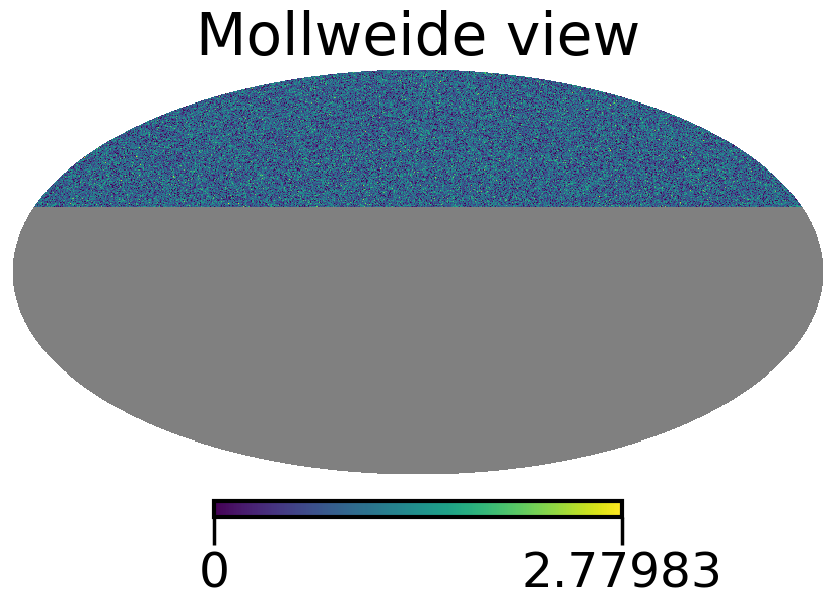

In [34]:
ww=zs_bin[0][0]['window']
mask=ww>-1.e15
hp.mollview(ww)

In [35]:
ww[mask].mean()

0.8808689880123769

[]

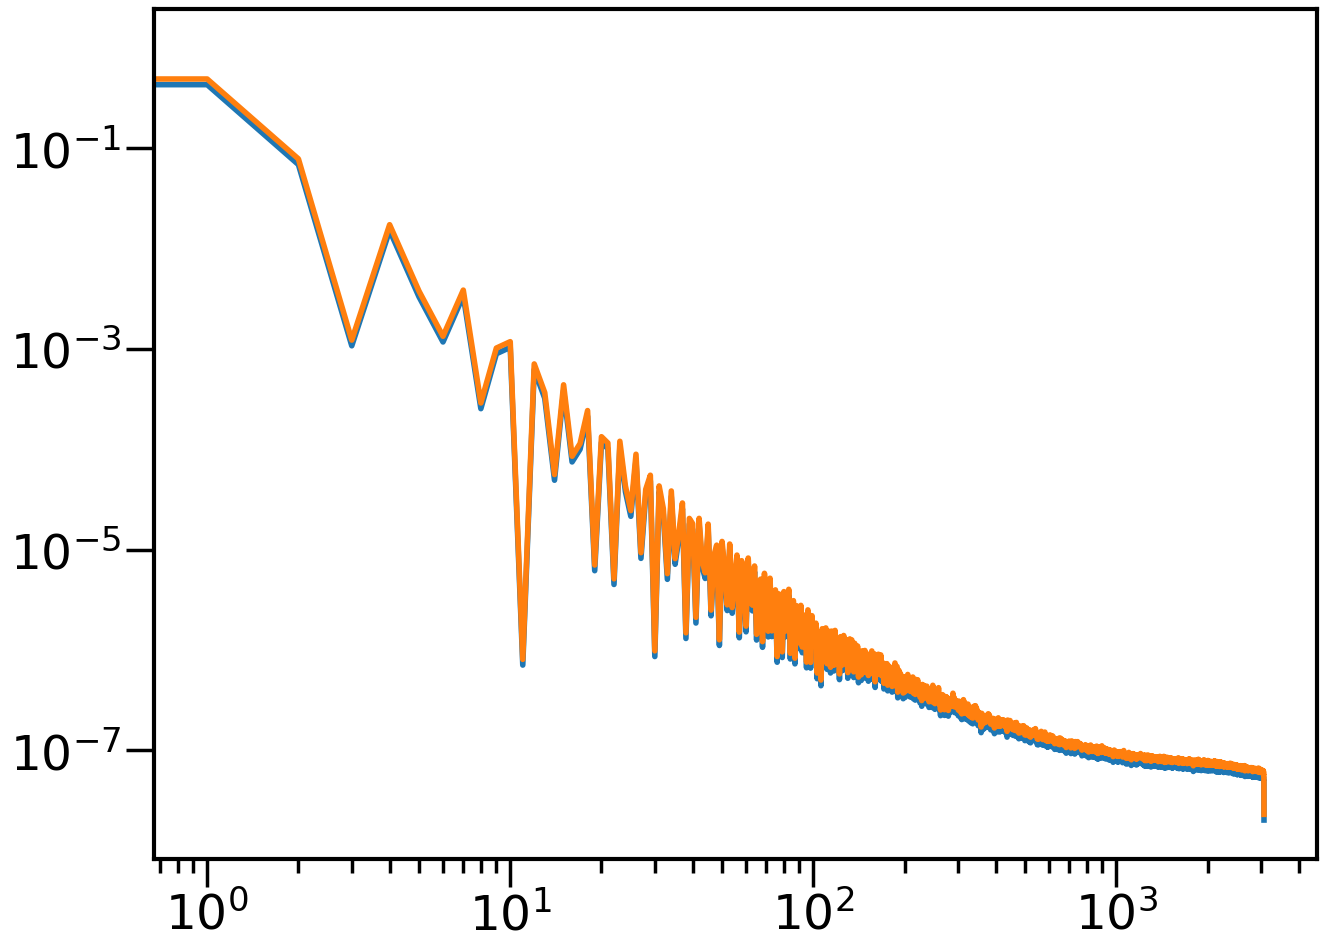

In [36]:
cl=hp.anafast(ww)
ww2=ww/np.sqrt(cl[0])
ww2[~mask]=hp.UNSEEN

cl2=hp.anafast(ww2)
l=np.arange(len(cl))
plot(l,cl)
plot(l,cl2)
loglog()

In [37]:
cl[0],cl2[0],ww[mask].mean()

(0.8775559729846706, 1.0, 0.8808689880123769)

In [38]:
tht,xi_ww_th=WT_L.projected_correlation(l_cl=l,cl=cl,s1_s2=(0,0))
tht,xi_ww_th2=WT_L.projected_correlation(l_cl=l,cl=cl2,s1_s2=(0,0))

In [39]:
ttq=get_treecorr_cat_args(maps={'galaxy':ww})

In [40]:
tree_catw=treecorr.Catalog(w=ww[mask], **ttq['galaxy'])
tree_corrw=treecorr.NNCorrelation(**corr_config)
tree_corrw.process(tree_catw)

In [41]:
tree_catw2=treecorr.Catalog(w=ww2[mask], **ttq['galaxy'])
tree_corrw2=treecorr.NNCorrelation(**corr_config)
tree_corrw2.process(tree_catw2)

In [42]:
nside

1024

In [43]:
npix=hp.nside2npix(nside)
na=hp.nside2pixarea(nside=nside,degrees=True)
ar=np.pi*(th_bins[1:]**2-th_bins[:-1]**2)
npairs2=npix*ar/na*f_sky

In [44]:
nside_t=128
npix=hp.nside2npix(nside_t)
na=hp.nside2pixarea(nside=nside_t,degrees=True)
npairs2=npix*ar/na

wt=np.ones(npix)
ttqt=get_treecorr_cat_args(maps={'galaxy':wt})
tree_catwt=treecorr.Catalog(w=wt, **ttqt['galaxy'])
tree_corrwt=treecorr.NNCorrelation(**corr_config)
tree_corrwt.process(tree_catwt)

wt2=wt*1.
wt2[int(npix/3):]=hp.UNSEEN
maskt=wt2==hp.UNSEEN
ttqt2=get_treecorr_cat_args(maps={'galaxy':wt2},masks={'galaxy':maskt})
tree_catwt2=treecorr.Catalog(w=wt2[~maskt], **ttqt2['galaxy'])
tree_corrwt2=treecorr.NNCorrelation(**corr_config)
tree_corrwt2.process(tree_catwt2)

In [45]:
tree_corrwt2.npairs/tree_corrwt.npairs

array([0.33231091, 0.33402053, 0.32644986, 0.33373768, 0.32726593,
       0.3278271 , 0.32793924, 0.32662521, 0.32668368, 0.32567871,
       0.32079294, 0.32032257, 0.31814842, 0.31586791, 0.31057518])

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

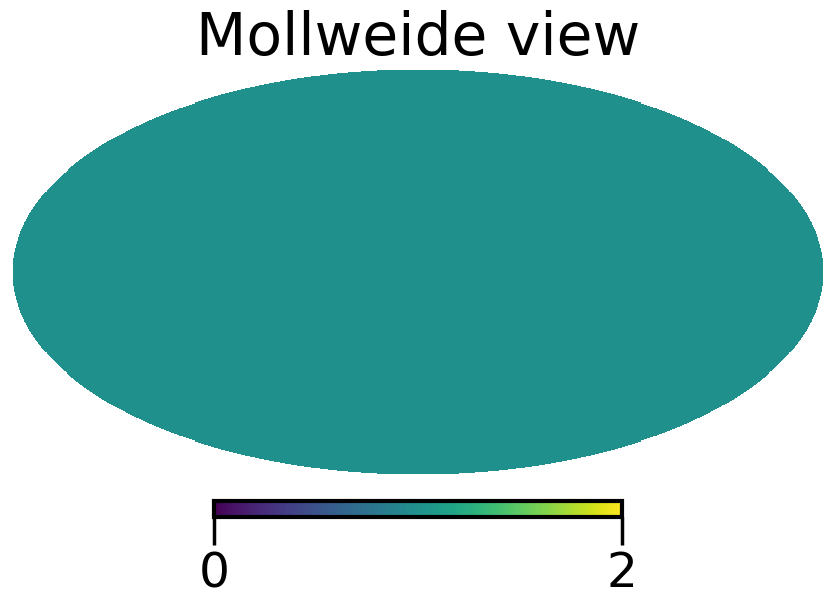

In [46]:
hp.mollview(wt)

In [47]:
tree_corrwt.npairs/npairs2

array([31.12038618, 32.28905752, 27.27790591, 33.8827716 , 32.75168831,
       30.33711651, 31.73986428, 30.8349358 , 31.40798111, 30.6720864 ,
       30.79538017, 30.45453509, 30.16052701, 29.5779283 , 29.49259257])

In [59]:
tree_corrw.weight/npairs2*2

NameError: name 'tree_corrw' is not defined

In [ ]:
tree_corrw.npairs/npairs2*2

In [ ]:
tree_corrw.weight/tree_corrw.npairs

In [ ]:
tree_corrw2.weight/tree_corrw2.npairs

In [ ]:
tree_corrw2.weight,tree_corrw2.npairs

In [37]:
cls0=(cl0[0]['cl'][corr_gg],cl0[0]['cl'][corr_ll],cl0[0]['cl'][corr_ll]*0,cl0[0]['cl'][corr_ggl])

In [38]:
cl_map=hp.synfast(cls0,nside=nside,new=True,pol=True,verbose=False)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

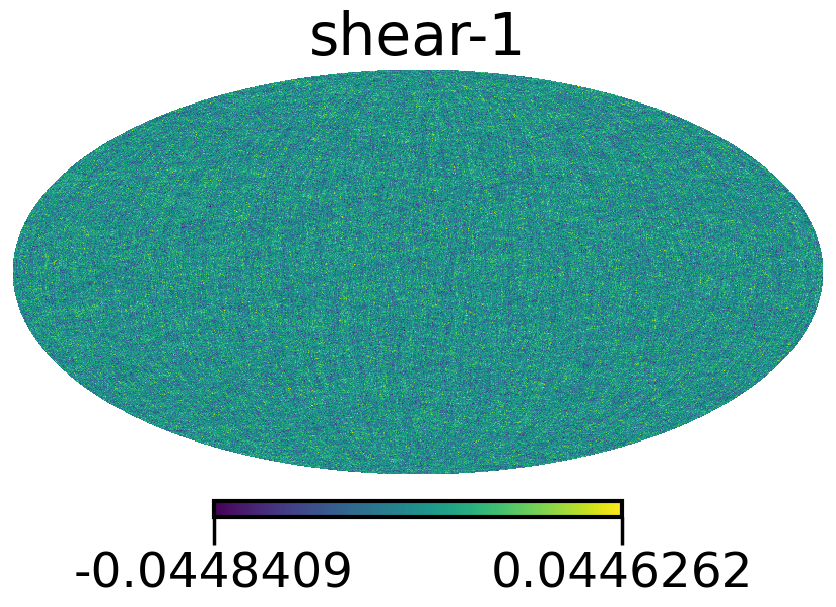

In [39]:
hp.mollview(cl_map[1],title='shear-1')

In [40]:
mask0=zs_bin[0][0]['window']==hp.UNSEEN
wf=zs_bin[0][0]['window'][~mask0].mean()
wf=1./wf
wf

1.1352425997609865

In [41]:
cl0[0]['cl'][corr_gg]

array([1.57697706e-06, 4.45605272e-06, 7.06802546e-06, ...,
       1.02097680e-07, 1.02050026e-07, 1.02002382e-07])

In [42]:
# zs_win=zs_bin[0][0]['window']*wf
wl=np.arange(len(cl0[0]['cl'][corr_gg]))
wl=np.ones_like(cl0[0]['cl'][corr_gg])
wl2=np.ones_like(cl0[0]['cl'][corr_gg])*1.e-7
zs_win=1.+hp.synfast(cl0[0]['cl'][corr_gg]*wl,nside=nside,new=True,pol=True,verbose=False)
zs_win[zs_win<0]=0
zs_win[mask0]=hp.UNSEEN
zs_win[~mask0]-=zs_win[~mask0].min()
zs_win[~mask0]/=zs_win[~mask0].mean()

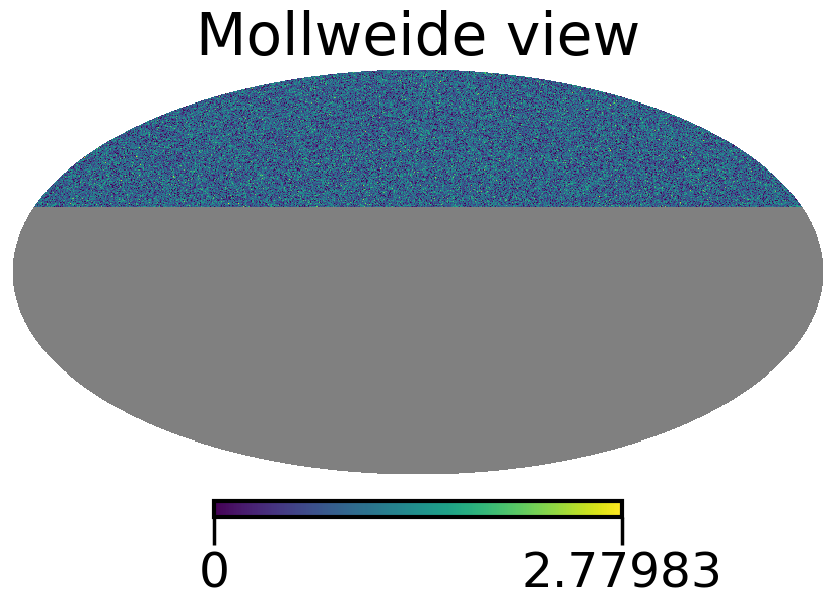

In [43]:
hp.mollview(zs_bin[0][0]['window'])

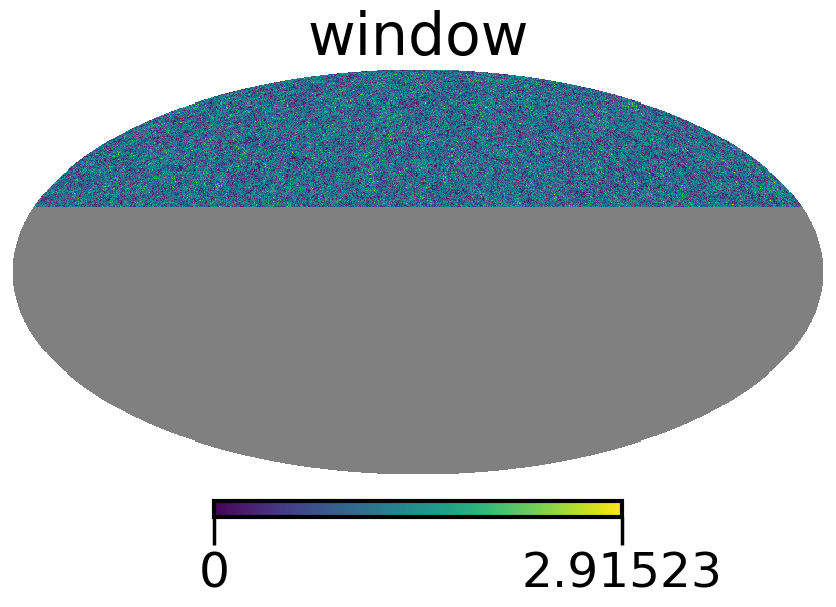

In [44]:
hp.mollview(zs_win,title='window')

In [45]:
x=zs_win[~mask0]==0
x2=zs_bin[0][0]['window'][~mask0]==0
x.mean(),x2.mean()

(0.011438795424375866, 0.022373732838164358)

[]

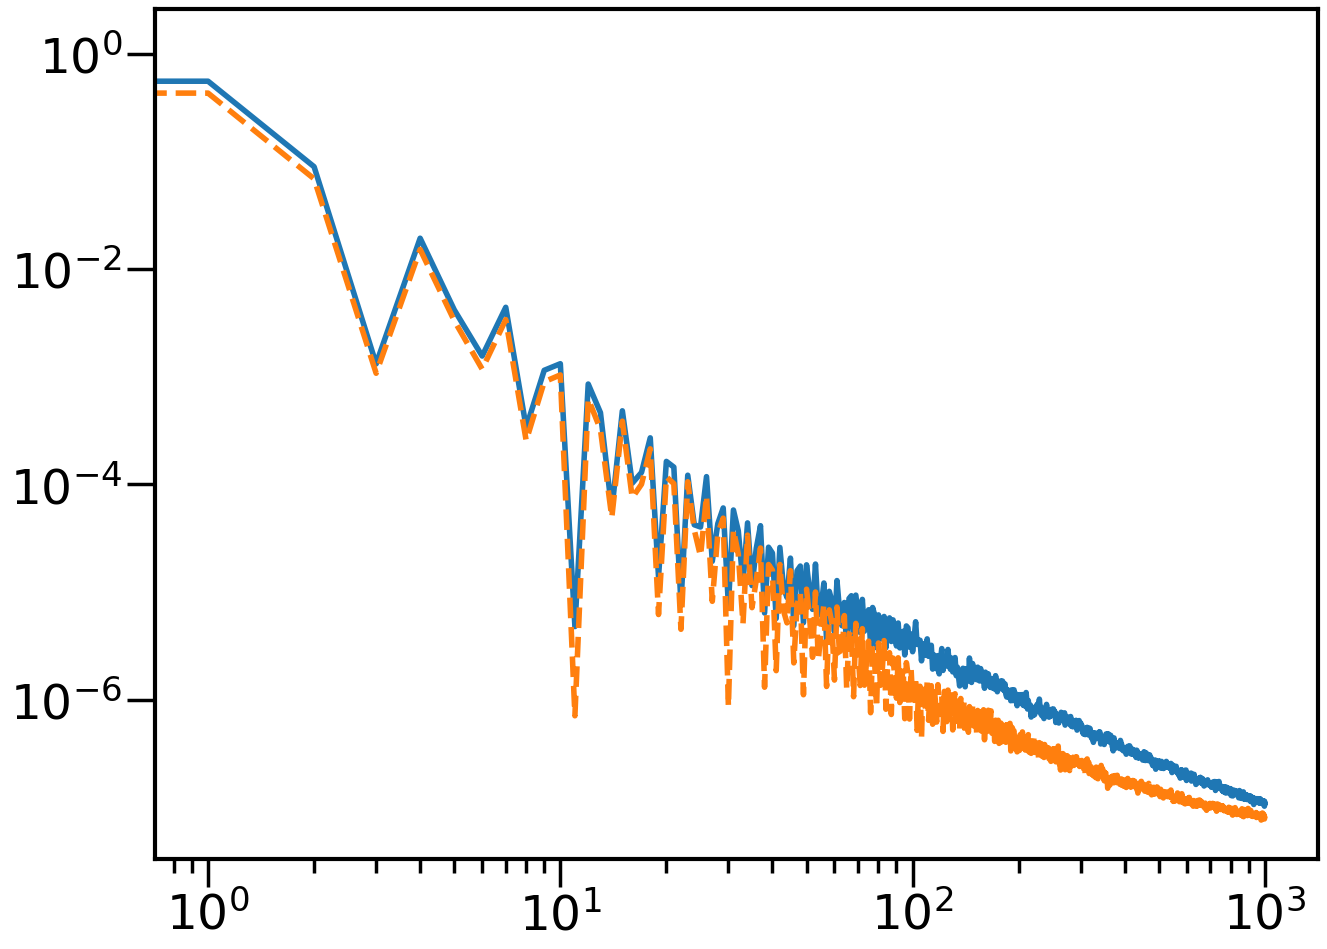

In [46]:
cc=hp.anafast(zs_win,lmax=1000)
cc2=hp.anafast(zs_bin[0][0]['window'],lmax=1000)
plot(cc)
plot(cc2,'--')
loglog()

In [47]:
cc/cc2

array([1.28877576, 1.28989825, 1.29532339, ..., 1.3499561 , 1.38827457,
       1.38525733])

In [48]:
cl_map_W=cl_map*1
cl_map_W[0]*=zl_bin[0][0]['window']*wf
cl_map_W[1]*=zs_win
cl_map_W[2]*=zs_win

masks={'galaxy':zl_bin[0][0]['window']==hp.UNSEEN,'shear':zs_win==hp.UNSEEN}
cl_map_W[0][masks['galaxy']]=hp.UNSEEN
cl_map_W[1][masks['shear']]=hp.UNSEEN
cl_map_W[2][masks['shear']]=hp.UNSEEN


In [49]:
masks={'galaxy':zl_bin[0][0]['window']==hp.UNSEEN,'shear':zs_win==hp.UNSEEN}
mapsW={'galaxy':cl_map_W[0],'shear':{0:cl_map_W[1],1:cl_map_W[2]}}
maps={'galaxy':cl_map[0],'shear':{0:cl_map[1],1:cl_map[2]}}
maps['galaxy'][masks['galaxy']]=hp.UNSEEN
maps['shear'][0][masks['shear']]=hp.UNSEEN
maps['shear'][1][masks['shear']]=hp.UNSEEN

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

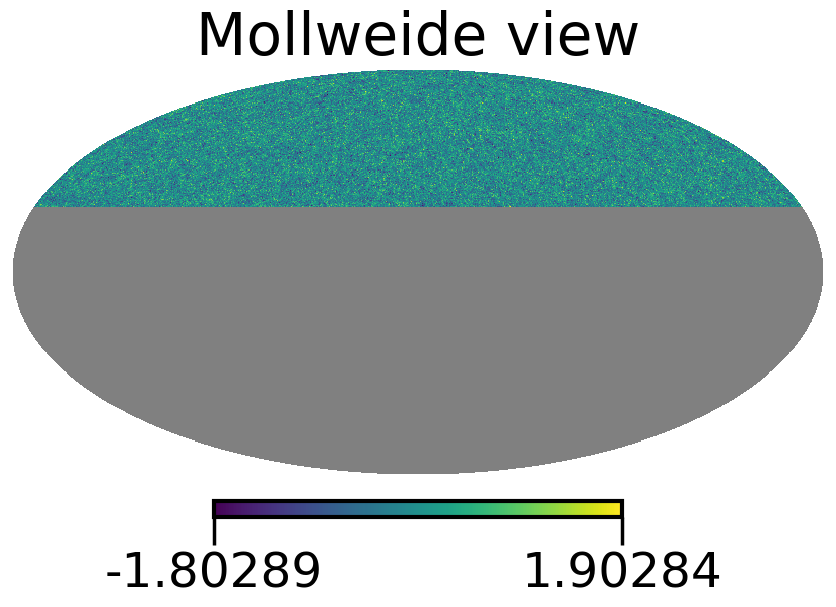

In [50]:
hp.mollview(maps['galaxy'])

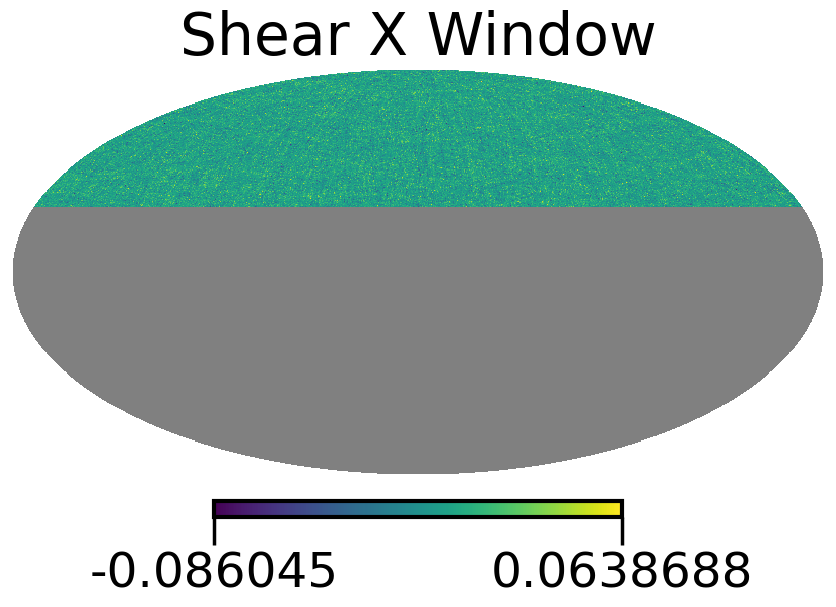

In [51]:
hp.mollview(mapsW['shear'][0],title='Shear X Window')

In [ ]:
x=[1,2,3]
{i:{},j:{} for i in x}

In [192]:
zs_win[~masks['shear']].shape

(3774873,)

In [193]:
tree_cat_args=get_treecorr_cat_args(maps=maps,masks=masks)
tree_cat={}
tree_catW={}
tree_cat['galaxy']=treecorr.Catalog(w=maps['galaxy'][~masks['galaxy']], **tree_cat_args['galaxy']) 
tree_cat['shear']=treecorr.Catalog(g1=maps['shear'][0][~masks['shear']],g2=maps['shear'][1][~masks['shear']],w=zs_win[~masks['shear']], 
                                   **tree_cat_args['shear'])

tree_catW['galaxy']=treecorr.Catalog(w=mapsW['galaxy'][~masks['galaxy']], **tree_cat_args['galaxy']) 
tree_catW['shear']=treecorr.Catalog(g1=mapsW['shear'][0][~masks['shear']],g2=mapsW['shear'][1][~masks['shear']], **tree_cat_args['shear'])

tree_cat['window']=treecorr.Catalog(w=zs_win[~masks['shear']], **tree_cat_args['galaxy'])

In [194]:
zs_win[~masks['shear']].mean()

1.0000000000000013

In [203]:
# tree_corrs_win=treecorr.NNCorrelation(**corr_config)
# tree_corrs_win.process(tree_cat['window'])
window_norm=tree_corrs_win.weight#*1./tree_corrs_win.npairs

In [204]:
tree_cat['shear']

treecorr.Catalog(ra=array([5.49778714, 3.92699082, 2.35619449, ..., 5.65962212, 5.65808814,
       5.65655416]),ra_units='rad',dec=array([1.56999897, 1.56999897, 1.56999897, ..., 0.41123273, 0.41123273,
       0.41123273]),dec_units='rad',w=array([0.57575118, 1.12942555, 0.614034  , ..., 0.66069578, 0.30932972,
       1.7560009 ]),g1=array([ 0.00779965, -0.01569233,  0.01009264, ..., -0.0016377 ,
       -0.00423701, -0.00364995]),g2=array([ 0.00586219, -0.01152246,  0.00801816, ...,  0.00852104,
       -0.00013098,  0.02443714]))

In [205]:
corr=corr_ll
tree_corrs=treecorr.GGCorrelation(**corr_config)
tree_corrs.process(tree_cat['shear'])
xip=tree_corrs.xip
xim=tree_corrs.xim

tree_corrsW=treecorr.GGCorrelation(**corr_config)
tree_corrsW.process(tree_catW['shear'])
xipW=tree_corrsW.xip*tree_corrsW.npairs/window_norm
ximW=tree_corrsW.xim/window_norm

In [198]:
tree_corrs.weight/tree_corrs_win.weight

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [199]:
tree_corrs.npairs/tree_corrs_win.npairs

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [200]:
xip/xipW,xim/ximW

(array([1.02328431, 1.02324474, 1.02314462, 1.023227  , 1.02323393,
        1.02325383, 1.0233299 , 1.02332104, 1.02333174, 1.0233626 ,
        1.02337086, 1.02338688, 1.02340477, 1.02341408, 1.02335629]),
 array([1.02328431, 1.02324474, 1.02314462, 1.02322985, 1.02343254,
        1.02387954, 1.02382362, 1.02362395, 1.02350279, 1.02372215,
        1.02377474, 1.02403336, 1.02397888, 1.02380414, 1.02374946]))

[]

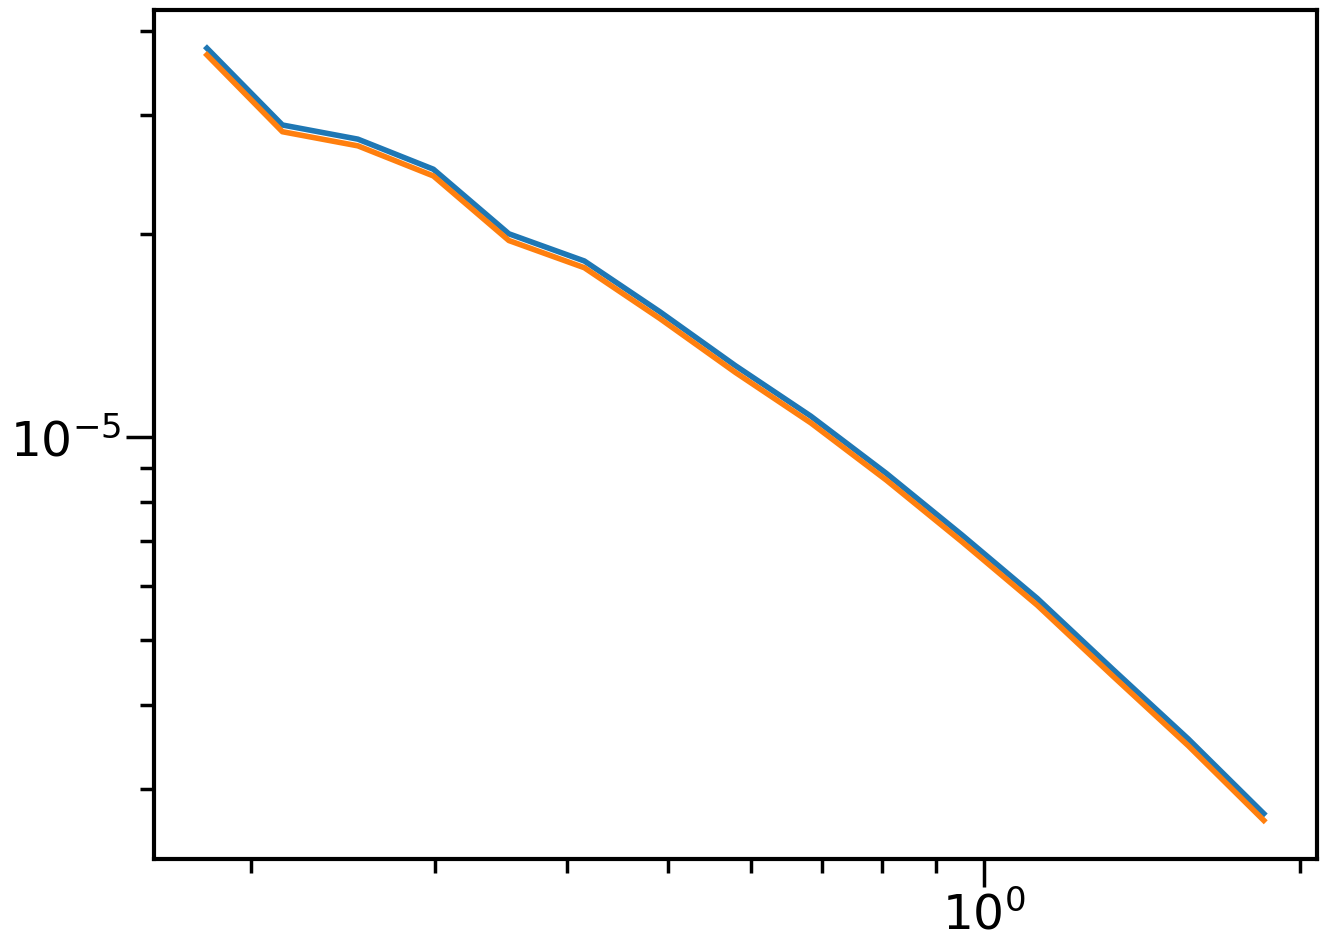

In [201]:
plot(thb,xip)
plot(thb,xipW)
loglog()

[]

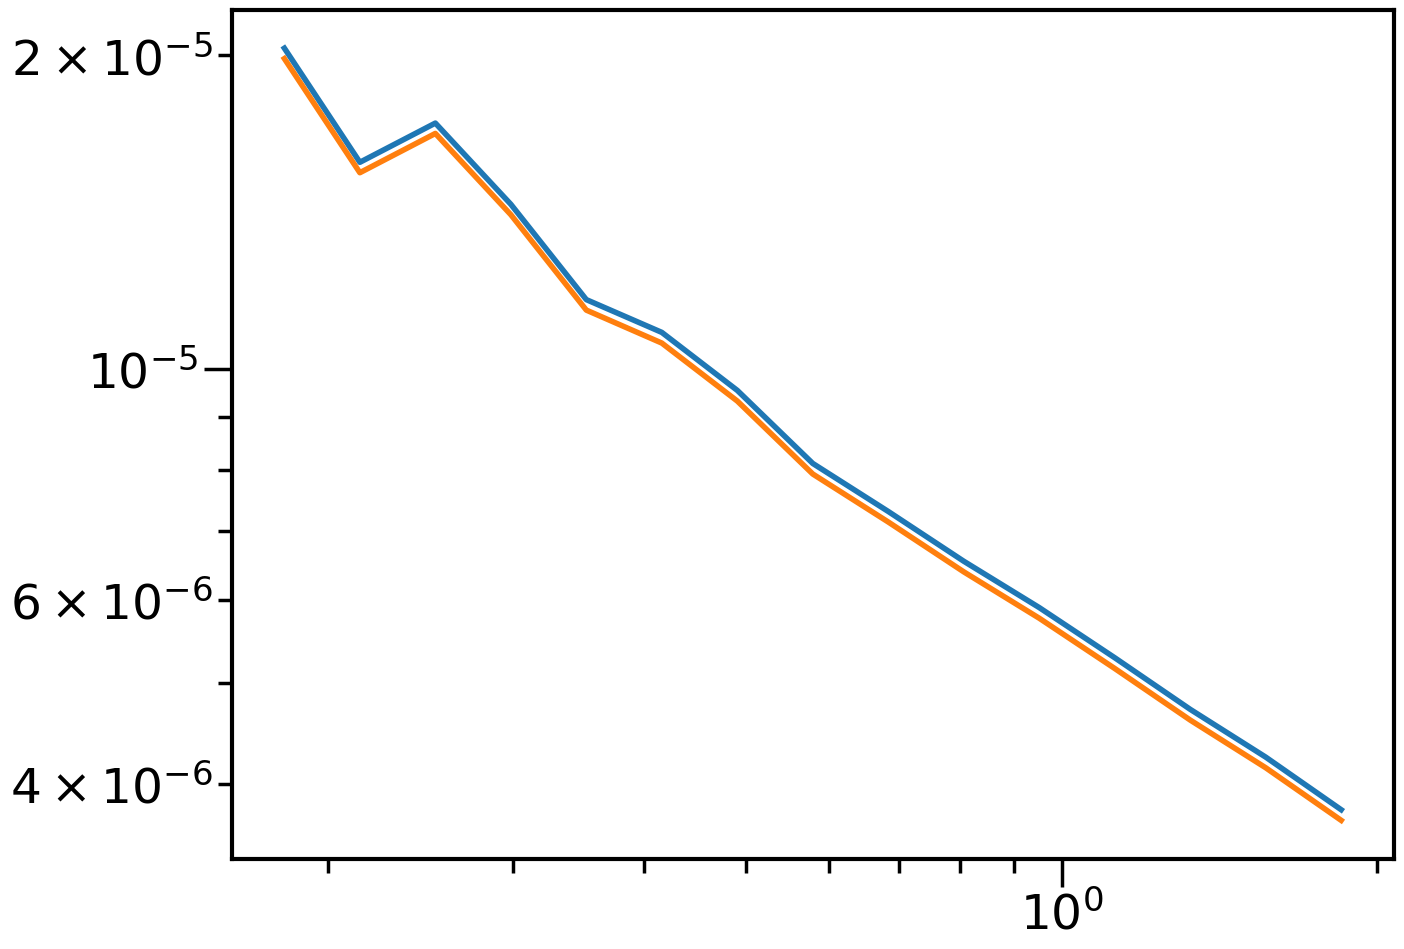

In [202]:
plot(thb,xim)
plot(thb,ximW)
loglog()

In [210]:
cov=np.eye(1)

In [211]:
cov

array([[1.]])

In [213]:
from scipy.stats import multivariate_normal

In [214]:
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=0, cov=cov)

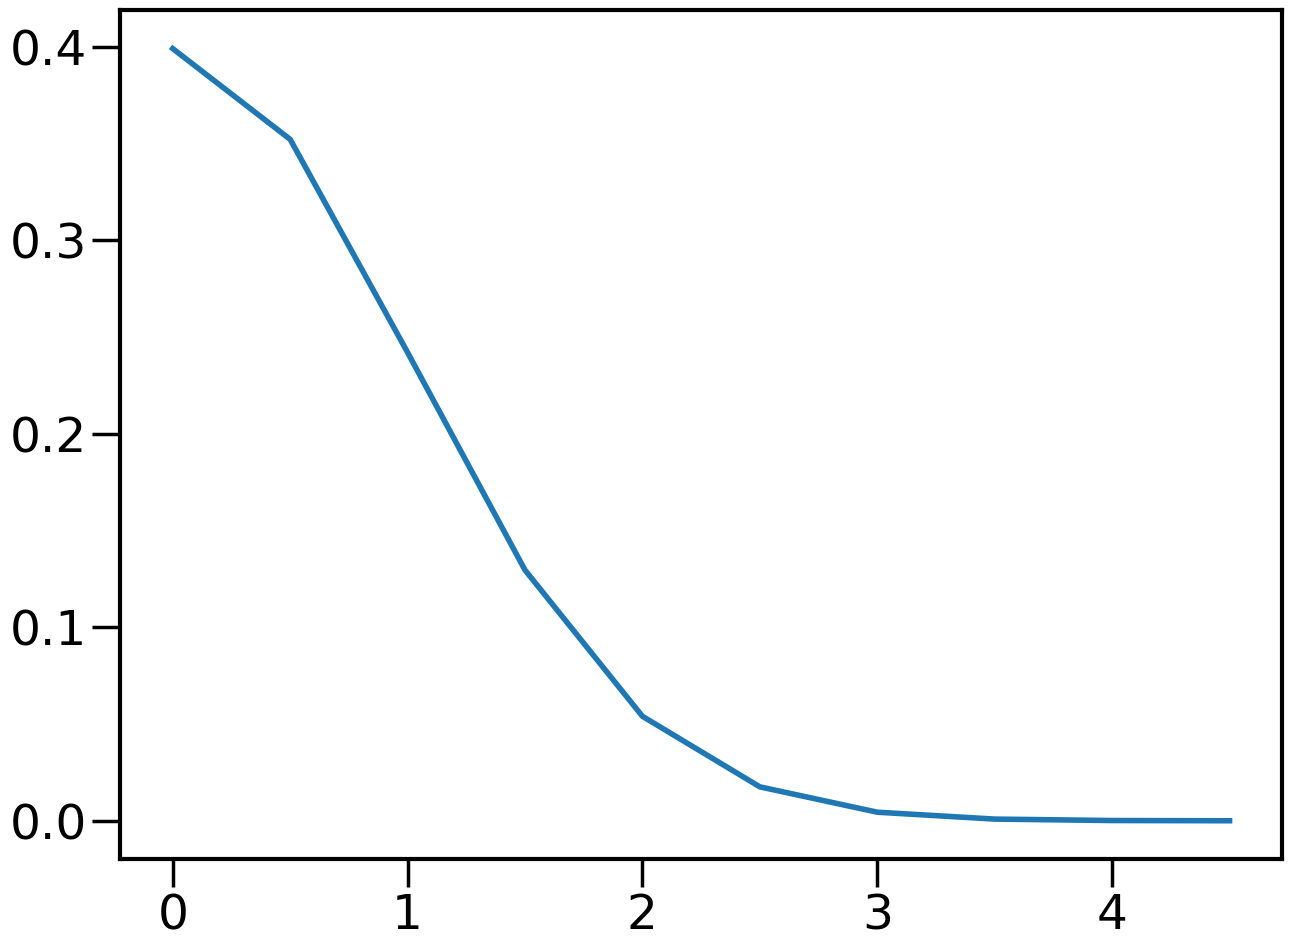

In [215]:
plot(x,y)

In [ ]:
crash

ValueError: x and y must have same first dimension, but have shapes (15,) and (20,)

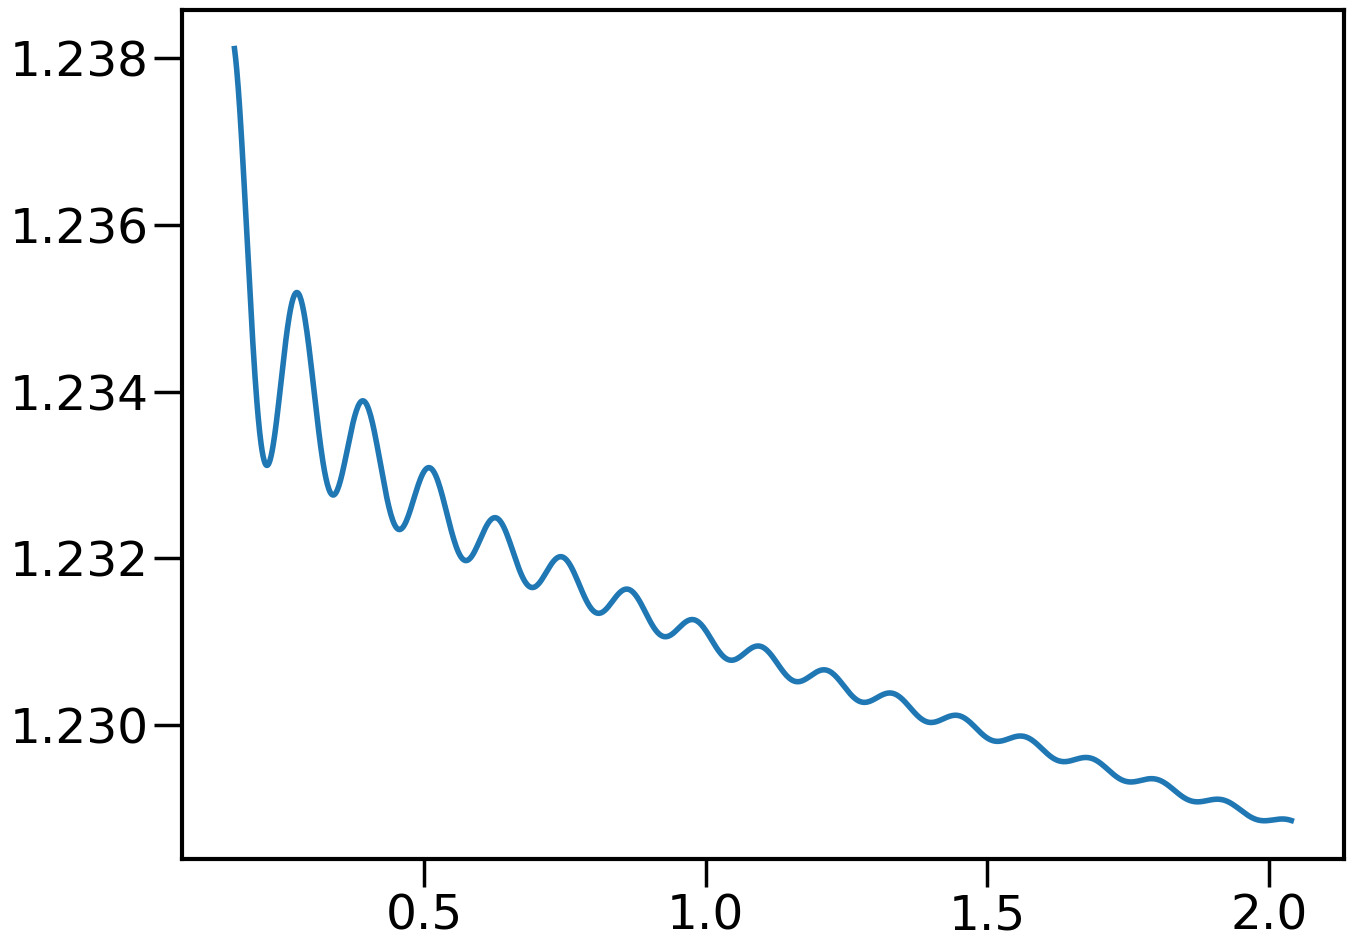

In [72]:
# plot(thb,kappa_win[0].Win.Win['cl'][corr_ll][bi]['xi_b'])
plot(th,1+xi_ww_th)
# plot(th,xi_ww_th2)
plot(thb,xi_simi['xi_window_norm']['full'][corr_ll]*1.5,'--')
plot(thb,tree_corrw.weight/npairs2*2*1.6,':')
xscale('log')

In [ ]:
th_bins

In [ ]:
th,xi_spin=WT_L.projected_correlation(l_cl=kappa_win[0].Win.window_l,cl=kappa_win[0].Win.Win['cl'][corr_ll][bi][12]['cl'],
                                   s1_s2=(2,-2))

In [ ]:
xi_spin

In [ ]:
xi_simi['xi_b_stats']['mean']/xi_simi['xi0']['xi']

In [ ]:
corr=corr_ll
bi=(0,0)

In [ ]:
outp[0]['simW'].keys()

In [ ]:
outp[simj]['zs_bin1']['SN'].keys()

In [ ]:
# errorbar(l,xi_sim_W['clp_stats']['mean'],xi_sim_W['clp_stats']['std'],fmt='ro')
f=1
for simj in np.arange(2):
    cl_simi=xi_sim_W[simj]
    cl0_wini=cl0_win[simj]
    cl0i=cl0[simj]
    i=0
    for corr in corrs:
        color=colors[i%len(colors)]
        errorbar(lb*(1+i*0.03),f*cl_simi['clg_b_stats']['iMaster'][corr]['mean'],
                 f*cl_simi['clg_b_stats']['Master'][corr]['std'],fmt='o',c=color)
        plot(lb*(1+i*0.03),f*cl0i['cl_b'][corr],c=color,label=labels[corr])
        i+=1
    # plot(lb,f*cl0_win_w['cl_b'][:39])
    # plot(lb,f*cl0_win['cl_b'])
    # plot(lb,f*coupling_Mw_binned@cl0['cl_b'])
    # plot(l,cl_sim_N['clg_stats']['mean'],'g--')
    xscale('log')
    yscale('log')
    xlabel(r'$\ell$')
    ylabel(r'$C_\ell$ (W1)')
    # xlim(10,1000)
    legend()
    ylim(1.e-10,1.e-4)
    show()

In [ ]:
f=lb
corr=corr_ll
for simj in np.arange(2):
    cl_simi=xi_sim_W[simj]
    cl0_wini=cl0_win[simj]
    cl0i=cl0[simj]
    i=0
    plot(lb,f*cl0i['cl_b'][corr],c=colors[0])
    plot(lb,f*(cl0_wini['cl_b'][corr]@cl_simi['coupling_M_binned_inv']['iMaster'][corr]),ls='--',c=colors[1])



In [ ]:
f=1
for corr in corrs:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    for simj in np.arange(2):
        cl_simi=xi_sim_W[simj]
        cl0i=cl0[simj]
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        pS.plot(lb,f*cl0i['cl_b'][corr],c=colors[i],label='Theory')
        pS.errorbar(lb,f*cl_simi['clg_b_stats']['iMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['iMaster'][corr]['std'],fmt='o',c=colors[3],mfc='white',mew=3,label=r'$\it i$MASTER',zorder=10)    
        pS.errorbar(lb*1.0,f*cl_simi['clg_b_stats']['Master'][corr]['mean'],f2*cl_simi['clg_b_stats']['Master'][corr]['std'],fmt='s',c=colors[2],mfc='white',mew=3,label=r'MASTER')
        pS.errorbar(lb,f*cl_simi['clg_b_stats']['nMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['nMaster'][corr]['std'],fmt='^',c=colors[1],mfc='white',mew=3,label=r'$\it n$MASTER')

        f=1./cl0i['cl_b'][corr]
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.03,f*cl_simi['clg_b_stats']['iMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['iMaster'][corr]['std'],fmt='o-',c=colors[3],mfc=None,mew=3,label=r'$\it i$MASTER',zorder=10)
        pR.errorbar(lb*1.06,f*cl_simi['clg_b_stats']['Master'][corr]['mean'],f2*cl_simi['clg_b_stats']['Master'][corr]['std'],fmt='s--',c=colors[2],mfc='white',mew=3,label=r'MASTER')
        pR.errorbar(lb,f*cl_simi['clg_b_stats']['nMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['nMaster'][corr]['std'],fmt='^--',c=colors[1],mfc='white',mew=3,label=r'$\it n$MASTER')

        # plot(lb,f*(coupling_M_binned_inv@xi_sim_W['clp_b'][0,:]))
        # plot(l,cl_sim_N['clg_stats']['mean'],'g--')
        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.95,1.05)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_ylim((lb*cl0i['cl_b'][corr]).min()*.9,(lb*cl0i['cl_b'][corr]).max()*1.1)
        tf=.9
        if corr==corr_ll:
            pS.set_ylim(3.e-7,1.e-6)
            pR.set_ylim(.9,1.11)
            tf=1
        pR.set_xlim(20,1000)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat C_\ell/C_\ell$')
            pS.set_ylabel(r'$\widehat C_\ell$ ')#+corr_labels[corr])
        pS.text(x=500,y=(lb*cl0i['cl_b'][corr]).max()*tf,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    ax[0,0].legend(ncol=2)
    ax[1,0].text(x=200,y=1.03,s=corr_labels[corr],fontsize=50)
    
    fname=fig_home+'/'+corr_fnames[corr]+'_master_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
    if not use_shot_noise:
        fname+='_noSN'
    if unit_window:
        fname+='_unit_window'
    if smooth_window:
        fname+='_smooth_window'


    fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)
    show()

In [ ]:
f=1
fig, ax =subplots(3,1,figsize=(20./1.5,20./1.5),sharex='col',sharey=False)
corr_i=0
for corr in corrs:
    for simj in np.arange(2):
        cl_simi=xi_sim_W[simj]
        cl0i=cl0[simj]
        pS=ax[corr_i]
#         if corr==corr_ll:
#             pS=ax[0,1]
#         if corr==corr_gg:
#             pS=ax[1,1]
#         if corr==corr_ggl:
#             pS=ax[0,0]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        pS.plot(lb,f*cl0i['cl_b'][corr],c=colors[i],label='Theory')
        pS.errorbar(lb,f*cl_simi['clg_b_stats']['iMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['iMaster'][corr]['std'],fmt='o',c=colors[3],mfc='white',mew=3,
                    label=r'$\it i$MASTER',zorder=10)    
#         pS.errorbar(lb*1.0,f*cl_simi['clg_b_stats']['Master'][corr]['mean'],f2*cl_simi['clg_b_stats']['Master'][corr]['std'],fmt='s:',c=colors[2],mfc='white',mew=3,
#                     label=r'MASTER')
        pS.errorbar(lb,f*cl_simi['clg_b_stats']['nMaster'][corr]['mean'],f2*cl_simi['clg_b_stats']['nMaster'][corr]['std'],fmt='^:',c=colors[1],mfc='white',mew=3,
                    label=r'$\it $MASTER')

        pS.set_ylim((lb*cl0i['cl_b'][corr]).min()*.9,(lb*cl0i['cl_b'][corr]).max()*1.1)
        tf=.9
        tx=1
        if corr==corr_ll:
            pS.set_ylim(1.e-7,1.1e-6)
            tf=1
        if corr==corr_gg:
            pS.set_ylim(1.e-5,1.1e-3)
            tx=1
        pS.set_xlim(20,1000)
        pS.set_xlabel(r'$\ell$')
        pS.set_xscale('log')
        if simj==0:
            pR.set_ylabel(r'$\widehat C_\ell/C_\ell$')
            pS.set_ylabel(r'$\widehat C_\ell$ ')#+corr_labels[corr])
#         pS.text(x=500,y=(lb*cl0['cl_b'][corr]).max()*tf,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            pS.text(x=400*tx,y=(lb*cl0i['cl_b'][corr]).max()*tf,s=corr_labels[corr],fontsize=50)
    corr_i+=1
ax[corr_i-2].legend(ncol=3,bbox_to_anchor=(.55,0.27))


fname=fig_home+'/'+corr_fnames[corr]+'_W2_master_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
if smooth_window:
    fname+='_smooth_window'


fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')z
print('saved to ',fname)
show()

In [ ]:
f=1
corr_i=0
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
for corr in corrs:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in np.arange(2):
        cl_simi=xi_sim_W[simj]
        cl0i=cl0[simj]
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        pS.errorbar(lb,f*cl_simi['clp_b_stats'][corr]['mean'],f*cl_simi['clp_b_stats'][corr]['std'],fmt=marker,c=color,label=corr_labels[corr])
        pS.plot(lb,f*cl_simi['clp0'][corr],c=color)

        f=1./cl_simi['clp0'][corr]
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.0,f*cl_simi['clp_b_stats'][corr]['mean'],f2*cl_simi['clp_b_stats'][corr]['std'],fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)
        if corr==corr_ll:
            f=lb
            pS.errorbar(lb*1.0,f*cl_simi['clpB_b_stats'][corr_gg]['mean'],f*cl_simi['clpB_b_stats'][corr_gg]['std'],fmt=marker,mfc='white',mew=3,c=colors[5],label=labels[corr]+'$^{BB}$')
            pS.plot(lb,f*cl_simi['clp_shear_B_b'],c=colors[5])

        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.95,1.05)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
        pS.set_ylim(1.e-10,8.e-4)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
ax[0,1].legend(ncol=4,loc='lower left',bbox_to_anchor=(-.07,0))
ax[0,0].set_yticks(np.logspace(-10,-4,7))
fname=fig_home+'/'+corr_fnames[corr]+'_pseudo_cl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
if smooth_window:
    fname+='_smooth_window'


fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)    
show()

In [ ]:
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from scipy import ndimage
from scipy.optimize import curve_fit


In [ ]:
def funct(lb,A,B=None,Bmax=1000):
    if B is None:
        B=100
    if B<0:
        return lb+np.inf
    if B>Bmax:
        return lb+np.inf
    return A+(1.-A)/(1+np.exp(-lb/B))
# xx=curve_fit(funct,xdata=lb,ydata=yy,p0=[0.8,100])



In [ ]:
for simj in np.arange(2):
    cl_simi=xi_sim_W[simj]
    cl0_wini=cl0_win[simj]
    cl0i=cl0[simj]
    for corr in corrs:
        cov2=cl_simi['coupling_M_binned_inv']['Master'][corr].T@cl0_wini['cov'][corr]@cl_simi['coupling_M_binned_inv']['Master'][corr]
        cm=corr_matrix(cov_mat=cov2[:500,:500])
        pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+', MASTER')
        show()

        cov2wt=cl_simi['coupling_M_binned_inv']['iMaster'][corr].T@cl0_wini['cov'][corr]@cl_simi['coupling_M_binned_inv']['iMaster'][corr]
        cm2wt=corr_matrix(cov_mat=cov2[:500,:500])
        pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+r', $i$MASTER')
        show()
        pcolor(lb,lb,cm-cm2wt,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+r', MASTER-$i$MASTER')
        show()
        plot(lb,np.diag(cov2/cov2wt),label='MASTER/$i$MASTER')
        xscale('log')
        hlines(1,10,1000)
        legend()
        show()
        cm2=corr_matrix(cov_mat=np.real(cl_simi['clg_b_stats']['Master'][corr]['cov']))
        pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+', Sim-MASTER')
        show()
        pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+', MASTER-Sim-Master')
        show()
        cm2wtS=corr_matrix(cov_mat=np.real(cl_simi['clg_b_stats']['iMaster'][corr]['cov']))
        pcolor(lb,lb,cm2wtS,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+', Sim-$i$MASTER')
        show()
        pcolor(lb,lb,cm2wt-cm2wtS,vmin=-1,vmax=1,cmap='seismic')
        xscale('log')
        yscale('log')
        title(str(corr)+', $i$MASTER-Sim-$i$MASTER')
        show()
        plot(lb,np.diag(cl_simi['clg_b_stats']['Master'][corr]['cov']/cov2),label='MASTER-sim/MASTER')
        xscale('log')
        hlines(1,10,1000)
        legend()
    #     show()
        plot(lb,np.diag(cl_simi['clg_b_stats']['iMaster'][corr]['cov']/cov2wt),label='iMASTER-sim/iMASTER',ls='--')
    #     plot(lb,np.diag(xi_sim_W['clg_bM2wt_stats'][corr]['cov']/cl0['cov'][corr]['final_b']),label='iMASTER-sim/mode count',ls=':')
        plot(lb,np.diag(cl_simi['clp_b_stats'][corr]['cov']/cl0_wini['cov'][corr]),label='pcl-sim/pcl',ls=':')

        xscale('log')
        hlines(1,10,1000)
        ylim(0.7,1.5)
        legend()
        show()

In [ ]:
def matrix_cut(mat=[],x=[]):
    m=mat[x]
    N=sum(x)
    m2=np.zeros((N,N))
    j=0
    for i in m:
        m2[j]=i[x]
        j=j+1
    return m2

def SN_cum(cov=[],lb=[],cl=[],diag=False,lmin=2,use_hartlap=False,nsim=1000):
    sni=np.zeros_like(lb)
    for i in np.arange(len(lb)):
        if lb[i]<lmin:
            continue
        x=lb<=lb[i]
        x*=lb>lmin
        cov2_cut=matrix_cut(mat=cov,x=x)
        if diag:
            cov2_cut=np.diag(np.diag(cov2_cut))
        cov2_cut_inv=np.linalg.inv(cov2_cut)
        
        cl_i=cl[x]
        SN2=cl_i@cov2_cut_inv@cl_i
        if use_hartlap:
            SN2*=(nsim-2-x.sum())/(nsim-1)
        sni[i]=SN2
    return sni

In [ ]:
def funct(lb,A,B=None,Bmax=500):
    if B is None:
        B=100
    if B<0:
        return lb+np.inf
    if B>Bmax:
        return lb+np.inf
    return A+(1.-A)/(1+np.exp(-lb/B))

In [ ]:
def cov_correct_sim(sim_cov=[],th_cov=[],smooth_scale=4,R_cut=None):
    cov_R=sim_cov/th_cov
    R_diag=np.diag(cov_R)
    xx=curve_fit(funct,xdata=lb,ydata=R_diag,p0=[0.8,100])
    R_smooth=funct(lb,*xx[0])
#     R_smooth=ndimage.gaussian_filter1d(R_diag, smooth_scale)
    
#     x=R_smooth>1.05
#     x[:2]=False
#     if R_cut is None:
#         if x.sum()==0:
#             R_cut=-1
#             print(R_cut)
#         else:
#             R_cut=np.min(np.where(x))
#     R_smooth[R_cut:]=1
    if R_cut is not None:
        R_smooth[R_cut:]=1
    correctG=np.outer(np.sqrt(R_smooth),np.sqrt(R_smooth))
    th_cov2=th_cov*correctG
    return th_cov2

In [ ]:
def cov_correct_sim_eig(sim_cov=[],th_cov=[],smooth_scale=4,R_cut=None): #this works well, but very sensitive to noise of sim matrix.
    ev,evec=np.linalg.eig(th_cov)
#     ev2,evec2=np.linalg.eig(sim_cov)
    
    
    vv=evec
    D=np.linalg.inv(vv)@sim_cov@vv
    ev2=np.diag(D)
    
    ev2R=ev2/ev
    print(ev2R)
#     ev2R=ndimage.gaussian_filter1d(ev2/ev, smooth_scale)
#     x=ev2R>1.02
#     x[:2]=False
#     if R_cut is None:
#         if x.sum()==0:
#             R_cut=-1
#             print(R_cut,ev2R)
#         else:
#             R_cut=np.min(np.where(x))
#     print(R_cut)
    if R_cut is not None:
        ev2R[R_cut:]=1
    ev2=ev*ev2R
    D=np.diag(ev2)

#     n=smooth_scale
#     ev[:n]=ev2[:n]
#     D=np.diag(ev)
    
    vv2=vv@D@np.linalg.inv(vv)
    return vv2,ev2R,ev

In [ ]:
def cov_correct_sim_eig_diff(sim_cov=[],th_cov=[],smooth_scale=0,R_cut=1): #this works well, but very sensitive to noise of sim matrix.
    cm_th=th_cov*1.0
    cm_sim=sim_cov*1.0
    cm_D=cm_th-cm_sim
    ev,evec=np.linalg.eig(cm_D)
    
    if smooth_scale!=0:
        if 'complex' in str(ev.dtype):
            ev=np.real(ev)
            print('complex ev, using real only')
        ev=ndimage.gaussian_filter1d(ev, smooth_scale)
    print('cov_correct_sim_eig_diff r-cut',R_cut)
    if R_cut is not None:
        ev[R_cut:]=0
    cm_th2=cm_th-evec@np.diag(ev)@np.linalg.inv(evec)
    return cm_th2

In [ ]:
def cov_correct_sim_eig_diff(sim_cov=[],th_cov=[],smooth_scale=0,R_cut=1): #this works well, but very sensitive to noise of sim matrix.
    cm_th=corr_matrix(cov_mat=th_cov)
    cm_sim=corr_matrix(cov_mat=sim_cov)
    cm_D=cm_th-cm_sim
    ev,evec=np.linalg.eig(cm_D)
    
    if smooth_scale!=0:
        if 'complex' in str(ev.dtype):
            ev=np.real(ev)
            print('complex ev, using real only')
        ev=ndimage.gaussian_filter1d(ev, smooth_scale)
    if R_cut is not None:
        ev[R_cut:]=0
    cm_th2=cm_th-evec@np.diag(ev)@np.linalg.inv(evec)
    
#     cov_R=sim_cov/th_cov
#     R_diag=np.diag(cov_R)
#     xx=curve_fit(funct,xdata=lb,ydata=R_diag,p0=[0.8,100])
#     R_smooth=funct(lb,*xx[0])
    
#     R_smooth*=np.diag(th_cov)
    R_smooth=np.diag(sim_cov)

    return cm_th2*np.outer(np.sqrt(R_smooth),np.sqrt(R_smooth))
    
#     D=th_cov-sim_cov
#     ev,evec=np.linalg.eig(D)
#     ev=ndimage.gaussian_filter1d(ev, smooth_scale)
#     vv=evec
#     D2=np.linalg.inv(vv)@D@vv
#     ev=np.array(np.diag(D2))
    
#     if R_cut is not None:
#         ev[R_cut:]=0
#     D2=vv@np.diag(ev)@np.linalg.inv(vv)
#     return th_cov-D2

In [ ]:
def sim_mean(sims={}):
    vv=np.array(list(sims.values()))
    sims['mean']=np.mean(vv,axis=0)
    sims['std']=np.std(vv,axis=0)
    sims['cov']=np.cov(vv,rowvar=0)
    return  sims

In [ ]:
corr=corr_ggl
cl_th=cl0_win[0]['cl_b'][corr]
cl_sim=xi_sim_W[0]['clp_b_stats'][corr]['mean']
plot(lb,cl_th/cl_sim)
corr=corr_gg
cl_th=cl0_win[0]['cl_b'][corr]
# cl_sim=xi_sim_W['clp_b_stats'][corr]['mean']
plot(lb,cl_th/cl_sim)
loglog()

In [ ]:
plot(kappa_win[i].l,np.diag(M_t))
plot(kappa_win[i].l,np.diag(M_t2))
loglog()

In [ ]:
outp[0]['cl0']['cov'].keys()

In [ ]:
corr=corr_ggl
cov_th=cl0_win[i]['cov'][corr]
cov_sim=xi_sim_W[i]['clp_b_stats'][corr]['cov']
plot(lb,np.diag(cov_th)/np.diag(cov_sim))
corr=corr_gg
cov_th=cl0_win[i]['cov'][corr]
cov_sim=xi_sim_W[i]['clp_b_stats'][corr]['cov']
plot(lb,np.diag(cov_th)/np.diag(cov_sim))
loglog()

In [ ]:
nsim=1000

In [ ]:
corr_t=[corr_gg,corr_ll,corr_ggl] #order in which sim corrs are output.
sn_W={}
sn_Ww={}
use_hartlap=True
smooth_scale=0
R_cut=2
for simj in np.arange(2):
    cl_simi=xi_sim_W[simj]
    cl0_wini=cl0_win[simj]
    cl0i=cl0[simj]
    sn_W[simj]={}
    corr_i=0

    for corr in corr_t: #corrs:
        sn_W[simj][corr]={}

        for k in ['iMaster','Master','nMaster']:
            cov2=cl_simi['coupling_M_binned_inv'][k][corr].T@cl0_wini['cov'][corr]@cl_simi['coupling_M_binned_inv'][k][corr]
            sn_W[simj][corr][k]=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clg_b_stats'][k][corr]['mean'])

            sim_cov=cl_simi['clg_b_stats'][k][corr]['cov']
            cov2_cG=cov_correct_sim_eig_diff(sim_cov=sim_cov,th_cov=cov2,smooth_scale=smooth_scale,R_cut=R_cut)
            sn_W[simj][corr][k+'_c']=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clg_b_stats'][k][corr]['mean'])
            
            cov2_cG=cov_correct_sim_eig_diff(sim_cov=sim_cov,th_cov=np.diag(np.diag(sim_cov)),smooth_scale=smooth_scale,R_cut=R_cut)
            sn_W[simj][corr][k+'_sim_smooth']=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clg_b_stats'][k][corr]['mean'])

            cov2=cl_simi['clg_b_stats'][k][corr]['cov']
            sn_W[simj][corr][k+'_sim']=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clg_b_stats'][k][corr]['mean'],use_hartlap=use_hartlap,nsim=nsim)

        cov2=cl0_wini['cov'][corr]
        sn_W[simj][corr]['clp']=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'])

        sim_cov=cl_simi['clp_b_stats'][corr]['cov']
        cov2_cG=cov_correct_sim_eig_diff(sim_cov=sim_cov,th_cov=cl0_wini['cov'][corr],smooth_scale=smooth_scale,R_cut=R_cut)
        sn_W[simj][corr]['clp_c']=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],use_hartlap=use_hartlap,nsim=nsim)

        cov2_cG=cov_correct_sim_eig_diff(sim_cov=sim_cov,th_cov=np.diag(np.diag(sim_cov)),smooth_scale=smooth_scale,R_cut=R_cut)
        sn_W[simj][corr]['clp_sim_smooth']=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],use_hartlap=use_hartlap,nsim=nsim)
        
        cov2=cl_simi['clp_b_stats'][corr]['cov']
        sn_W[simj][corr]['clp_sim']=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],use_hartlap=use_hartlap,nsim=nsim)

        if corr==corr_ll:
            cov2=cl_simi['clpB_b_stats'][corr_gg]['cov']
            sn_W[simj][corr]['clpB_sim']=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clpB_b_stats'][corr_gg]['mean'],use_hartlap=use_hartlap,nsim=nsim)

        cov2=cl0i['cov'][corr]['final_b']
        sn_W[simj][corr]['cl0']=SN_cum(cov=cov2,lb=lb,cl=cl0i['cl_b'][corr])

        corr_i+=1

In [ ]:
sn_W[simj][corr_ll]['clp_sim']/sn_W[simj][corr_ll]['clp_sim_smooth']

In [ ]:
nsim_sub=100
use_hartlap=True
for simj in np.arange(2):
    cl_simi=xi_sim_W[simj]
    cl0_wini=cl0_win[simj]
    cl0i=cl0[simj]
    corr_i=0

    for corr in corr_t: #corrs:
        for k in ['iMaster','Master','nMaster']:
            sn_W[simj][corr][k+'_sim100']={}
        sn_W[simj][corr]['clp_sim100']={}
        sn_W[simj][corr]['clp_sim100_smooth']={}
        sn_W[simj][corr]['clp_c100']={}

        for i in np.arange(nsim/nsim_sub,dtype='int'):
            start_i=i*nsim_sub
            end_i=start_i+nsim_sub

            for k in ['iMaster','Master','nMaster']:
                clp_simW_100=cl_simi['clg_b'][k][start_i:end_i,:,:]
                cov2=np.cov(clp_simW_100[:, : ,corr_i],rowvar=0)
                sn_W[simj][corr][k+'_sim100'][i]=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clg_b_stats'][k][corr]['mean'],
                                                  use_hartlap=use_hartlap,nsim=nsim_sub)

            clp_simW_100=cl_simi['clp_b'][start_i:end_i,:,:]
            cov2=np.cov(clp_simW_100[:, : ,corr_i],rowvar=0)
            sn_W[simj][corr]['clp_sim100'][i]=SN_cum(cov=cov2,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],
                                               use_hartlap=use_hartlap,nsim=nsim_sub)


            clp_simW_100=cl_simi['clp_b'][start_i:end_i,:,:]
            cov2=np.cov(clp_simW_100[:, : ,corr_i],rowvar=0)
            #     xi_sim_Ww['clp_b_stats'][corr]['cov']
            cov2_cG=cov_correct_sim_eig_diff(sim_cov=cov2,th_cov=cl0_wini['cov'][corr],smooth_scale=smooth_scale,R_cut=R_cut)
            sn_W[simj][corr]['clp_c100'][i]=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],
                                             use_hartlap=use_hartlap,nsim=nsim_sub)

            cov2_cG=cov_correct_sim_eig_diff(sim_cov=cov2,th_cov=np.diag(np.diag(cov2)),smooth_scale=smooth_scale,R_cut=R_cut)
            sn_W[simj][corr]['clp_sim100_smooth'][i]=SN_cum(cov=cov2_cG,lb=lb,cl=cl_simi['clp_b_stats'][corr]['mean'],
#                                                         use_hartlap=use_hartlap,
                                                            nsim=nsim_sub
                                                        )
            
            
        for k in ['iMaster','Master','nMaster']:
            sn_W[simj][corr][k+'_sim100']=sim_mean(sn_W[simj][corr][k+'_sim100'])

        sn_W[simj][corr]['clp_sim100']=sim_mean(sn_W[simj][corr]['clp_sim100'])
        sn_W[simj][corr]['clp_sim100_smooth']=sim_mean(sn_W[simj][corr]['clp_sim100_smooth'])
        sn_W[simj][corr]['clp_c100']=sim_mean(sn_W[simj][corr]['clp_c100'])

        print(corr,corr_i)
        corr_i+=1


In [ ]:
f=1
for corr in kappa0.corrs:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    for simj in np.arange(2):
        sn=sn_W[simj]
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        ci=0
        for k in ['clp']:#,'iMaster','Master','nMaster']:
            pS.plot(lb,sn[corr][k+'_sim'],':',c=colors[ci])
            pS.plot(lb*1.03,sn[corr][k+'_c'],'-',c=colors[ci])
            pS.plot(lb*1.03,sn[corr][k],'--',c=colors[ci])
            pS.errorbar(lb,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,)#label=k)
            pS.errorbar(lb*1.03,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)


            pR.plot(lb,sn[corr][k+'_sim']/sn[corr][k],'--',c=colors[ci])
            pR.plot(lb*1.03,sn[corr][k+'_sim']/sn[corr][k+'_c'],'-',c=colors[ci])
            pR.errorbar(lb,sn[corr][k+'_sim100']['mean']/sn[corr][k],sn[corr][k+'_sim100']['std']/sn[corr][k],fmt=markers[ci],c=colors[ci],mfc='white',mew=3)#,label=k)
            pR.errorbar(lb*1.03,sn[corr][k+'_sim100']['mean']/sn[corr][k+'_c'],sn[corr][k+'_sim100']['std']/sn[corr][k+'_c'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)
#             ci+=1
        pR.plot(lb,sn[corr]['clp_sim']/sn[corr]['clp'],'--',c=colors[ci])

        pR.plot(lb*1.03,sn[corr]['clp_sim']/sn[corr]['clp_c'],'-',c=colors[ci])

        pR.errorbar(lb,sn[corr]['clp_sim100']['mean']/sn[corr]['clp'],sn[corr]['clp_sim100']['std']/sn[corr]['clp'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label='$D_\ell$')

        pR.errorbar(lb*1.03,sn[corr]['clp_sim100']['mean']/sn[corr]['clp_c'],sn[corr]['clp_sim100']['std']/sn[corr]['clp_c'],fmt=markers[ci],
                 mfc=None,mew=3,c=colors[ci])#,label='p-cl, corrected')

        pR.errorbar(lb*1.03,sn[corr]['clp_sim100']['mean']/sn[corr]['clp_c'],sn[corr]['clp_sim100']['std']/sn[corr]['clp_c'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)

#     text(x=500,y=2,s=labels[corr])
        pR.set_xlim(10,1000)
        pR.set_xscale('log')
        pR.set_yscale('log')
        pS.set_yscale('log')
        pS.text(x=200,y=10,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        pR.hlines(1,10,1000)
        pR.hlines(1-0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1-0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
    ax[1,0].set_ylabel('Sim/theory')
    ax[0,0].set_ylabel(r'cumulative $(\frac{S}{N})^2$')
    ax[1,0].set_xlabel(r'$\ell_{max}$')
    ax[1,0].legend()
    yscale('log')
#     ylim(0.8,1.1)

        
    
#     ax[0,0].legend(ncol=2)
    ax[0,0].text(x=20,y=5.e2,s=corr_labels[corr],fontsize=50)
    
    fname=fig_home+'/'+corr_fnames[corr]+'_master_SN_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
    if not use_shot_noise:
        fname+='_noSN'
    if unit_window:
        fname+='_unit_window'
    if smooth_window:
        fname+='_smooth_window'


    fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)
    show()

In [ ]:
f=1
for corr in kappa0.corrs:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    for simj in np.arange(2):
        sn=sn_W[simj]
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        ci=0
        for k in ['clp']:#,'iMaster','Master','nMaster']:
            pS.plot(lb,sn[corr][k+'_sim'],':',c=colors[ci])
            pS.errorbar(lb,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,)#label=k)
            pS.errorbar(lb*1.03,sn[corr][k+'_sim100_smooth']['mean'],sn[corr][k+'_sim100_smooth']['std'],fmt=markers[ci],
                        c=colors[ci],mfc=None,mew=3)

#             ci+=1
        pR.errorbar(lb,sn[corr]['clp_sim100']['mean']/sn[corr]['clp_sim'],sn[corr]['clp_sim100']['std']/sn[corr]['clp_sim'],
                    fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label='$D_\ell$')

        pR.errorbar(lb*1.03,sn[corr]['clp_sim100_smooth']['mean']/sn[corr]['clp_sim'],sn[corr]['clp_sim100_smooth']['std']/sn[corr]['clp_sim'],
                    fmt=markers[ci],mfc=None,mew=3,c=colors[ci])#,label='p-cl, corrected')
        pR.set_xlim(10,1000)
        pR.set_xscale('log')
        pR.set_yscale('log')
        pS.set_yscale('log')
        pS.text(x=200,y=1,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        pR.hlines(1,10,1000)
        pR.hlines(1-0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1-0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
    ax[1,0].set_ylabel('Sim/theory')
    ax[0,0].set_ylabel(r'$(\frac{S}{N})^2$')
    ax[1,0].legend()
    yscale('log')
#     ylim(0.8,1.1)

        
    
#     ax[0,0].legend(ncol=2)
    ax[0,0].text(x=20,y=5.e2,s=corr_labels[corr],fontsize=50)
    
    fname=fig_home+'/'+corr_fnames[corr]+'_master_SN_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
    if not use_shot_noise:
        fname+='_noSN'
    if unit_window:
        fname+='_unit_window'
    if smooth_window:
        fname+='_smooth_window'


    fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)
    show()

In [ ]:
f=1
fig, ax =subplots(3,1,figsize=(20./1.5,20./1.5),sharex='col',sharey=False)
corr_i=0
for corr in kappa0.corrs:
    i=0
    ci=0
    for simj in np.arange(2):
        cl_simi=xi_sim_W[simj]
        pS=ax[corr_i]
        sn=sn_W
        
        f=lb
        f2=f/sqrt(nsim)

#         for k in ['iMaster','Master','nMaster']:
#             pS.plot(lb,sn[corr][k+'_sim'],':',c=colors[ci])
#             pS.plot(lb*1.03,sn[corr][k+'_c'],'-',c=colors[ci])
#             pS.plot(lb*1.03,sn[corr][k],'--',c=colors[ci])
#             pS.errorbar(lb,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label=k)
#             pS.errorbar(lb*1.03,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)
#             ci+=1
        k='clp'
        print(corr,sn[simj][corr].keys())
        pS.plot(lb,sn[simj][corr][k+'_sim'],'-',c=colors[ci],label='1000 Gaussian Simulations')
        ci+=1
#         pS.plot(lb*1.03,sn[corr][k+'_c'],'-',c=colors[ci],label='Hybrid')
#         ci+=1
        pS.plot(lb*1.03,sn[simj][corr][k],'--',c=colors[ci],label='Analytical')
        ci+=1
        pS.errorbar(lb,sn[simj][corr][k+'_sim100']['mean'],sn[simj][corr][k+'_sim100']['std'],
                    fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label='Hybrid (100 Simulations)')
        pS.set_xscale('log')
        pS.set_yscale('log')
        pS.text(x=15,y=300,s=corr_labels[corr],fontsize=50)
        pS.set_xlim(10,1000)
        
    corr_i+=1 

ax[0].legend()
ax[1].set_ylabel(r'Cumulative $(\frac{S}{N})^2$')
ax[2].set_xlabel(r'$\ell_{max}$')
fname=fig_home+'/'+corr_fnames[corr]+'_W2_SN_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
if smooth_window:
    fname+='_smooth_window'


fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')z
print('saved to ',fname)
show()

In [ ]:
f=1
for corr in kappa0.corrs:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    for simj in np.arange(2):
        sn=sn_W[simj]
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        ci=0
        for k in ['iMaster','Master','nMaster']:
            pS.plot(lb,sn[corr][k+'_sim'],':',c=colors[ci])
            pS.plot(lb*1.03,sn[corr][k+'_c'],'-',c=colors[ci])
            pS.plot(lb*1.03,sn[corr][k],'--',c=colors[ci])
            pS.errorbar(lb,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label=k)
#             pS.errorbar(lb*1.03,sn[corr][k+'_sim100']['mean'],sn[corr][k+'_sim100']['std'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)

            fR=sn[corr]['clp_c']
            pR.plot(lb,sn[corr][k+'_sim']/fR,'--',c=colors[ci])
            pR.plot(lb*1.03,sn[corr][k+'_sim']/fR,'-',c=colors[ci])
            pR.errorbar(lb,sn[corr][k+'_sim100']['mean']/fR,sn[corr][k+'_sim100']['std']/fR,fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label=k)
#             pR.errorbar(lb*1.03,sn[corr][k+'_sim100']['mean']/fR,sn[corr][k+'_sim100']['std']/fR,fmt=markers[ci],c=colors[ci],mfc=None,mew=3)
            ci+=1
        
        pR.plot(lb*1.03,sn[corr]['clp_sim']/sn[corr]['clp_c'],'-',c=colors[ci])

        pR.errorbar(lb*1.03,sn[corr]['clp_sim100']['mean']/sn[corr]['clp_c'],sn[corr]['clp_sim100']['std']/sn[corr]['clp_c'],fmt=markers[ci],
                 mfc=None,mew=3,c=colors[ci])#,label='p-cl, corrected')

        pR.errorbar(lb*1.03,sn[corr]['clp_sim100']['mean']/sn[corr]['clp_c'],sn[corr]['clp_sim100']['std']/sn[corr]['clp_c'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)

#     text(x=500,y=2,s=labels[corr])
        pR.set_xlim(10,1000)
        pR.set_xscale('log')
        pR.set_yscale('log')
        pS.set_yscale('log')
        pS.text(x=200,y=1,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        pR.hlines(1,10,1000)
        pR.hlines(1-0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1-0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
        pR.hlines(1+0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
    ax[1,0].set_ylabel('Sim/theory')
    ax[0,0].set_ylabel(r'$(\frac{S}{N})^2$')
    ax[1,0].legend()
    yscale('log')
#     ylim(0.8,1.1)

        
    
#     ax[0,0].legend(ncol=2)
    ax[0,0].text(x=20,y=5.e2,s=corr_labels[corr],fontsize=50)
    
    fname=fig_home+'/'+corr_fnames[corr]+'_master_Dl_SN_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))
    if not use_shot_noise:
        fname+='_noSN'
    if unit_window:
        fname+='_unit_window'
    if smooth_window:
        fname+='_smooth_window'


    fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)
    show()

In [ ]:
for corr in corrs:
    ci=0
    for k in ['iMaster','Master','nMaster']:
        plot(lb,sn_W[corr][k+'_sim']/sn_W[corr][k],'--',c=colors[ci])
        plot(lb*1.03,sn_W[corr][k+'_sim']/sn_W[corr][k+'_c'],'-',c=colors[ci])
        errorbar(lb,sn_W[corr][k+'_sim100']['mean']/sn_W[corr][k],sn_W[corr][k+'_sim100']['std']/sn_W[corr][k],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label=k)
        errorbar(lb*1.03,sn_W[corr][k+'_sim100']['mean']/sn_W[corr][k+'_c'],sn_W[corr][k+'_sim100']['std']/sn_W[corr][k+'_c'],fmt=markers[ci],c=colors[ci],mfc=None,mew=3)
        ci+=1
    plot(lb,sn_W[corr]['clp_sim']/sn_W[corr]['clp'],'--',c=colors[ci])
    
    plot(lb*1.03,sn_W[corr]['clp_sim']/sn_W[corr]['clp_c'],'-',c=colors[ci])
    
    errorbar(lb,sn_W[corr]['clp_sim100']['mean']/sn_W[corr]['clp'],sn_W[corr]['clp_sim100']['std']/sn_W[corr]['clp'],fmt=markers[ci],c=colors[ci],mfc='white',mew=3,label='p-cl')
    
    errorbar(lb*1.03,sn_W[corr]['clp_sim100']['mean']/sn_W[corr]['clp_c'],sn_W[corr]['clp_sim100']['std']/sn_W[corr]['clp_c'],fmt=markers[ci],
             mfc=None,mew=3,c=colors[ci])#,label='p-cl, corrected')
    
    errorbar(lb*1.03,sn_W[corr]['clp_sim100']['mean']/sn_W[corr]['clp_c'],sn_W[corr]['clp_sim100']['std']/sn_W[corr]['clp_c'],fmt=markers[3],c=colors[3],mfc=None,mew=3)

    text(x=500,y=2,s=labels[corr])
    xlim(10,1000)
    xscale('log')
    hlines(1,10,1000)
    hlines(1-0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
    hlines(1+0.05,10,1000,ls=':',zorder=-10,alpha=0.5)
    hlines(1-0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
    hlines(1+0.1,10,1000,ls=':',zorder=-10,alpha=0.5)
    ylabel('Sim/theory (W2)')
    legend()
#     yscale('log')
#     ylim(0.8,1.1)
    show()

In [ ]:
for corr in corrs:
    ci=0
    for k in ['iMaster','Master','nMaster']:
        plot(lb,sn_W[corr][k],c=colors[ci])
        plot(lb,sn_W[corr][k+'_sim'],'o',c=colors[ci])
        
#         plot(lb,sn_Ww[corr][k],'--',c=colors[ci])
#         plot(lb,sn_Ww[corr][k+'_sim'],'^',c=colors[ci])
        ci+=1
        
    plot(lb,sn_W[corr]['clp'],c=colors[ci])
    plot(lb,sn_W[corr]['clp_c'],'--',c='k')
    
    plot(lb,sn_W[corr]['clp_sim'],'o',c=colors[ci])
    if corr==corr_ll:
        plot(lb,sn_W[corr]['clpB_sim'],'o',c=colors[4])
    
#     plot(lb,sn_Ww[corr]['clp'],'--',c=colors[3])
#     plot(lb,sn_Ww[corr]['clp_c'],'--',c='k')
#     plot(lb,sn_Ww[corr]['clp_M'],'--',c=colors[3])
    
    plot(lb,sn_W[corr]['cl0'],':',c=colors[4])
    xlim(10,1000)
    xscale('log')
    yscale('log')
    show()

In [ ]:
cm=corr_matrix(cov_mat=sn_W[corr]['Master_sim100']['cov'])
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title(corr)

In [ ]:
for corr in corrs:
    ci=0
    for k in ['iMaster','Master','nMaster']:
        plot(lb,sn_W[corr][k]/sn_W[corr]['cl0'],'-',c=colors[ci])
        plot(lb,sn_W[corr][k+'_sim']/sn_W[corr]['cl0'],'o',c=colors[ci])
        plot(lb,sn_W[corr][k]/sn_W[corr]['cl0'],'--',c=colors[ci])
        plot(lb,sn_W[corr][k+'_sim']/sn_W[corr]['cl0'],'^',c=colors[ci])
        ci+=1
    plot(lb,sn_W[corr]['clp']/sn_W[corr]['cl0'],':',c=colors[ci])
    
    plot(lb,sn_W[corr]['clp_sim']/sn_W[corr]['cl0'],'o',c=colors[ci])
    
#     plot(lb,sn_Ww[corr]['clp']/sn_W[corr]['cl0'],':',c=colors[3])
    
#     plot(lb,sn_Ww[corr]['clp_sim']/sn_W[corr]['cl0'],'o',c=colors[3])
    
    xlim(10,1000)
    xscale('log')
#     yscale('log')
#     ylim(0.8,1.1)
    show()

In [ ]:
cm=corr_matrix(cov_mat=np.real(xi_sim_W['clp_b_stats'][corr]['cov']))
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- sims')
show()
cm2=corr_matrix(cov_mat=cl0_win['cov'][corr])
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- theory')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')



In [ ]:
corr=corr_gg
cm=corr_matrix(cov_mat=np.real(xi_sim_W['clp_b_stats'][corr]['cov']))
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('$gg$ p-$C_\ell$ correlation, sims, W1')
show()
cm2=corr_matrix(cov_mat=cl0_win['cov'][corr])
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('$gg$ p-$C_\ell$ correlation, theory, W1')
show()
cov_t=xi_sim_W['coupling_M_binned']['iMaster'][corr].T@cl0['cov'][corr]['final_b']@xi_sim_W['coupling_M_binned']['iMaster'][corr]
cm22=corr_matrix(cov_mat=cov_t)
pcolor(lb,lb,cm22,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('$gg$ p-$C_\ell$ correlation, theory-2, W1')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('$gg$ p-$C_\ell$ Sims-theory, W1')
show()
pcolor(lb,lb,cm-cm22,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('$gg$ p-$C_\ell$ Sims-theory2, W1')

In [ ]:
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+' theory'
    plot(lb,np.diag(cl0_win['cov'][corr]),'--',label=lbl,color=color)
    lbl=labels[corr]+' sim'
    plot(lb,np.diag(np.real(xi_sim_W['clp_b_stats'][corr]['cov'])),label=lbl,color=color)
    i+=1
legend()
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\delta p-C_\ell^2$')
show()
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+'theory'
    plot(lb,np.diag(cl0['cov'][corr]['final_b']),'--',label=lbl,color=color)
    
    lbl=labels[corr]+'sim'+' Master'
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['Master'][corr]['cov'])),label=lbl,color=color)
    lbl=labels[corr]+'sim'+ ' iMaster'
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['iMaster'][corr]['cov'])),':',label=lbl,color=color)
    i+=1
xscale('log')
yscale('log')
legend()
xlabel(r'$\ell$')
ylabel(r'$\delta C_\ell^2$')

In [ ]:
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+' theory'
    plot(lb,np.diag(np.real(xi_sim_W['clp_b_stats'][corr]['cov']))/np.diag(cl0_win['cov'][corr]),label=lbl,color=color)
    i+=1
legend()
xscale('log')
hlines(1,10,2000)
# yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\delta p-C_\ell^2$')
show()


i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['Master'][corr]['cov']))/np.diag(cl0_win['cov'][corr]),label=lbl,color=color)
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['iMaster'][corr]['cov']))/np.diag(cl0_win['cov'][corr]),label=lbl,color=color,ls='--')
    i+=1
xscale('log')
hlines(1,10,2000)
ylim(0.5,1.5)
# yscale('log')
legend()
xlabel(r'$\ell$')
ylabel(r'$\delta C_\ell^2$')
show()


i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['Master'][corr]['cov']))/np.diag(cl0['cov'][corr]['final_b']),label=lbl,color=color)
    plot(lb,np.diag(np.real(xi_sim_W['clg_b_stats']['iMaster'][corr]['cov']))/np.diag(cl0['cov'][corr]['final_b']),label=lbl,color=color,ls='--')
    i+=1
xscale('log')
hlines(1,10,2000)
ylim(0.5,1.5)
# yscale('log')
legend()
xlabel(r'$\ell$')
ylabel(r'$\delta C_\ell^2$')

In [ ]:
for corr in corrs:
    plot(lb,xi_sim_W['clg_b_stats']['nMaster'][corr]['percetile_score'],':',label='nMaster')
    plot(lb,xi_sim_W['clg_b_stats']['Master'][corr]['percetile_score'],'--',label='Master')
    plot(lb,xi_sim_W['clg_b_stats']['iMaster'][corr]['percetile_score'],label='iMaster')
    legend()
    xscale('log')
    hlines(50,10,2000)
    xlabel('$\ell$')
    ylabel(labels[corr]+', $C_\ell$ th percentile score (W1)')
    xlim(10,1000)
    show()

In [ ]:
from scipy.stats import wishart,norm,multivariate_normal
from scipy.optimize import minimize
from scipy.stats import entropy,chi2
from scipy.optimize import minimize
def wishart_entropy(df,d):
    if df<1 or not np.isfinite(df):
        return np.inf
    df=df[0]
    m=d.mean()
    
    d=d
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW*=count.max()/pW.max()
#     print(entropy(count,pW),df)
#     crash
    return entropy(count,pW)

In [ ]:
corr=corr_gg
corr_indx=0

In [ ]:
shear_lcut=kappa_win.l>=2
cut=kappa_win.l>0
s=0
if 'shear' in corr:
    cut=shear_lcut
    s=2
coupling_M=kappa_win.Win.Win['cl'][corr][(0,0)]['M']
coupling_M4=kappa_win.Win.Win['cov'][corr+corr][(0,0,0,0)]['M'][1324]['clcl'][s] #*2
# coupling_M_inv=np.linalg.inv(coupling_M)
coupling_M_inv=np.zeros_like(coupling_M)
coupling_M_inv[:,cut][cut,:]=np.linalg.inv(coupling_M[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.
coupling_M_binned2=kappa_win.binning.bin_2d(cov=coupling_M,bin_utils=kappa_win.cl_bin_utils) #this doesnot work... difference of bin size
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_M_binned2*=dl
coupling_M_binned=bin_coupling_M(kappa_win,coupling_M)
coupling_M_binned_inv=np.linalg.inv(coupling_M_binned)
coupling_M_binned2_inv=np.linalg.inv(coupling_M_binned2)
coupling_M4_binned=bin_coupling_M(kappa_win,coupling_M4)
coupling_M4_binned2=kappa_win.binning.bin_2d(cov=coupling_M4,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4_binned_inv=np.linalg.inv(coupling_M4_binned)

coupling_M_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_M_inv,bin_utils=kappa_win.cl_bin_utils)

coupling_Mw=kappa_win_w.Win.Win['cl'][corr][(0,0)]['M']
coupling_M4w=kappa_win_w.Win.Win['cov'][corr+corr][(0,0,0,0)]['M'][1324]['clcl'][s] #*2
# coupling_Mw_inv=np.linalg.inv(coupling_Mw)
coupling_Mw_inv=np.zeros_like(coupling_Mw)
coupling_Mw_inv[:,cut][cut,:]=np.linalg.inv(coupling_Mw[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.

coupling_Mw_binned2=kappa_win_w.binning.bin_2d(cov=coupling_Mw,bin_utils=kappa_win_w.cl_bin_utils) #this doesnot work... difference of bin size
coupling_Mw_binned2*=dl
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_Mw_binned=bin_coupling_M(kappa_win_w,coupling_Mw)
coupling_Mw_binned_inv=np.linalg.inv(coupling_Mw_binned)
coupling_Mw_binned2_inv=np.linalg.inv(coupling_Mw_binned2)
coupling_M4w_binned=bin_coupling_M(kappa_win_w,coupling_M4w)
coupling_M4w_binned2=kappa_win.binning.bin_2d(cov=coupling_M4w,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4w_binned_inv=np.linalg.inv(coupling_M4w_binned)

coupling_Mw_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_Mw_inv,bin_utils=kappa_win.cl_bin_utils)

In [ ]:
kappa_win.SN[corr].shape

In [ ]:
df_fit=np.zeros_like(lb)
coupling_M_binned=xi_sim_W['coupling_M_binned']['iMaster'][corr]
# coupling_M4_binned2=xi_sim_W['coupling_M4_binned2'][corr]
for l_i in np.arange(len(lb)):
#     l_i=1
    shot_noise=kappa_win.SN[corr][0,0,0]
#     noise_f=(cl0_win['cl_b'][corr][l_i]+shot_noise)/cl0_win['cl_b'][corr][l_i]
    noise_f=1#(cl0['cl_b'][corr][l_i]+shot_noise)/cl0['cl_b'][corr][l_i] #this should be cl, not p-cl
    df=xi_sim_W['nu_b'][l_i]/noise_f**2
    df2=df*np.diag(coupling_M_binned)[l_i]/f_sky
    df3=np.diag(coupling_M_binned)**2/np.diag(coupling_M4_binned2) #* np.gradient(lb)
    df3/=noise_f**2
    df3=df3[l_i]
    df=max(1,df)
    df2=max(1,df2)
    df3=max(1,df3)
    
    print(df)

    d=xi_sim_W['clg_b']['iMaster'][:,l_i,corr_indx]
#     m=xi_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=df3,args=(d),method='Powell',options={'maxiter':1000})
    print(xx.success)
    df_xx=np.float32(xx.x)
    df_fit[l_i]=df_xx
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pW3=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
    pW3[x]=wishart.pdf(edges_m[x],scale=m/df3,df=df3)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    print(df_xx)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label='no Win, df='+str(np.around(df,decimals=2)))
    plot(edges_m,pW2,'--',label='Win, df='+str(np.around(df2,decimals=2)))
    plot(edges_m,pW3,'-.',label='Win +cov, df='+str(np.around(df3,decimals=2)))
    plot(edges_m,pWF,label='fit, df='+str(np.around(df_xx,decimals=2)))
    vlines(m,0,pW.max())
    vlines(cl0['cl_b'][corr][l_i],0,pW.max(),linestyles='--')
    
    legend()
    show()
    i+=1
#     crash


In [ ]:
noise_f=(cl0['cl_b'][corr]+shot_noise)/cl0['cl_b'][corr]
df=xi_sim_W['nu_b']/noise_f**2
df2=df*np.diag(coupling_M_binned)/f_sky
df3=np.diag(coupling_M_binned)**2/np.diag(coupling_M4_binned2)# * np.gradient(lb)
# df3*=2
df3/=noise_f**2
f=1./lb**2
plot(lb,df_fit*f,label='fit')
plot(lb,df*f,label='fsky')
plot(lb,df2*f,label='F2')
plot(lb,df3*f,label='F4')
xscale('log')
# yscale('log')
ylim(0.,0.1)
legend()

In [ ]:
df_fitw=np.zeros_like(lb)
coupling_Mw_binned=xi_sim_Ww['coupling_M_binned']['iMaster'][corr]
for l_i in np.arange(len(lb)):
    shot_noise=kappa_win.SN[corr][0,0,0]
#     noise_f=(cl0_win['cl_b'][corr][l_i]+shot_noise)/cl0_win['cl_b'][corr][l_i]
    noise_f=1#(cl0['cl_b'][corr][l_i]+shot_noise)/cl0['cl_b'][corr][l_i] #this should be cl, not p-cl
    df=xi_sim_W['nu_b'][l_i]/noise_f**2
    df2=df*np.diag(coupling_Mw_binned)[l_i]/f_sky
    df3=np.diag(coupling_Mw_binned)**2/np.diag(coupling_M4w_binned2) #* np.gradient(lb)
    df3/=noise_f**2
    df3=df3[l_i]
    if df3<1:
        print(df3,df)
        df3=1
#     df=df3[l_i]
    d=xi_sim_Ww['clg_b']['iMaster'][:,l_i]
#     m=xi_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=df3,args=(d),method='Powell')
    df_xx=np.float32(xx.x)
    df_fitw[l_i]=df_xx
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pW3=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
    pW3[x]=wishart.pdf(edges_m[x],scale=m/df3,df=df3)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell=$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label=r'$\nu_{(2\ell+1)f_{sky}}=$'+str(np.around(df,decimals=2)))
#     plot(edges_m,pW2,'--',label=np.around(df2,decimals=2))
    plot(edges_m,pW3,'-.',label=r'$\nu_{win}=$'+str(np.around(df3,decimals=2)))
    plot(edges_m,pWF,label=r'$\nu_{fit}=$'+str(np.around(df_xx,decimals=2)))
#     vlines(m,0,pW.max())
#     vlines(cl0['cl_b'][l_i],0,pW.max(),linestyles='--')
    xlabel(r'$C_{\ell}$')
    legend()
    show()
#     crash

In [ ]:
noise_f=(cl0['cl_b']+shot_noise)/cl0['cl_b']
df=xi_sim_Ww['nu_b']/noise_f**2
df2=df*np.diag(coupling_Mw_binned)/f_sky
df3=np.diag(coupling_Mw_binned)**2/np.diag(coupling_M4w_binned2)# * np.gradient(lb)
# df3*=2
df3/=noise_f**2
f=1./lb**2
plot(lb,df_fitw*f,label='fit')
plot(lb,df*f,label='fsky')
plot(lb,df2*f,label='F2')
plot(lb,df3*f,label='F4')
xscale('log')
# yscale('log')
ylim(0.,0.1)
legend()

In [ ]:
for l_i in np.arange(len(lb)):
#     l_i=1
    df=xi_sim_W['nu_b'][l_i]/f_sky
    df2=df/np.diag(coupling_M_binned_inv)[l_i]#/f_sky
    d=xi_sim_W['clp_b'][:,l_i]
#     m=xi_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=1,args=(d),method='Powell')
    df_xx=np.float32(xx.x)
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label=np.around(df,decimals=2))
    plot(edges_m,pW2,'--',label=np.around(df2,decimals=2))
    plot(edges_m,pWF,label=np.around(df_xx,decimals=2))
    vlines(m,0,pW.max())
    vlines(cl0_win['cl_b'][l_i],0,pW.max(),linestyles='--')
    
    legend()
    show()
#     crash

In [ ]:
import jk_utils
reload(jk_utils)
from jk_utils import *

In [ ]:
def get_cljk(cl_map,N_map,jk_win):
    x=jk_win>-1000
    print(x.mean())
    cl_map_jk=cl_map*jk_win
    N_map_jk=N_map*np.sqrt(jk_win)
    jk_map=cl_map_jk+N_map_jk
    
    jk_map[~x]=hp.UNSEEN
    
    clp=hp.anafast(jk_map,lmax=np.int(l0.max()))
    return clp

In [ ]:
def jk_mean(p={},njk=100,subsample=False):
#     if check_empty(p):
#         print ('jk-mean: got empty dict')
#         return p
    p2={}
    nn=np.arange(njk)
    for i in nn: #p.keys():
        #if i in nn:
        p2[i]=p[i]
    jk_vals=np.array(list(p2.values()))
    mean=np.mean(jk_vals,axis=0)
    #print mean
    var=np.var(jk_vals,axis=0,ddof=0)
    cov=np.cov(jk_vals,rowvar=0)
    if subsample:
        var/=njk
        cov/=njk
    else:
        cov*=(njk-1)
    p['mean']=mean
    p['err']=np.sqrt(var) 
    p['cov']=cov
    p['corr']=corr_matrix(cov_mat=cov)
    return p

def sample_mean(p={},nsamp=100):
#     if check_empty(p):
#         print ('sample-mean: got empty dict')
#         return p
    p2={}
    nn=np.arange(nsamp)
    for i in nn: #p.keys():
        #if i in nn:
        p2[i]=p[i]
    jk_vals=np.array(list(p2.values()))
    mean=np.mean(jk_vals,axis=0)
    #print mean
    var=np.var(jk_vals,axis=0,ddof=0)
    p['mean']=mean
    p['err']=np.sqrt(var)
    try:
        cov=np.cov(jk_vals,rowvar=0)
        p['cov']=cov
        p['corr']=corr_matrix(cov_mat=cov)
    except Exception as err:
        p['cov']=err
        p['corr']=err
    return p

In [ ]:
njk1=10
njk2=njk1
njk=njk1*njk2

In [ ]:
mask=zs_bin1[0]['window']>-1000
mask=mask.astype('bool')
jkmap=jk_map(mask=mask,nside=nside,njk1=njk1,njk2=njk2)

In [ ]:
hp.mollview(jkmap)

In [ ]:
corr=corr_gg

In [ ]:
njk_sims=10

In [ ]:
kappa0.SN[corr][bi]

In [ ]:
local_state = np.random.RandomState(12312)
clg0=cl0['cl'][corr]
clN0=kappa0.SN[corr][bi]*np.ones_like(clg0)#[:256]
cl_map={}
N_map={}
for i in np.arange(njk_sims):
    cl_map[i]=hp.synfast(clg0,nside=nside,RNG=local_state)#new=True,pol=False)
    N_map[i]=hp.synfast(clN0,nside=nside,RNG=local_state)#new=True,pol=False)

In [ ]:
# zs_bins=zs_bin1
zs_bins=zl_bin1

In [ ]:
jk_corr_indxs={}
jk_corr_indxs[corr]=[(i,i) for i in np.arange(njk2)]

In [ ]:
client.restart()

In [ ]:
subsample=True
fsky_f=njk*1./(njk-1.)
if subsample:
    fsky_f=njk

In [ ]:
# clp_jk={}
# clg_jk={}
# Mcl_jk={}
# MN_jk={}


# for isim in np.arange(njk_sims):
#     clp_jk[isim]={}
#     clg_jk[isim]={}
#     Mcl_jk[isim]={}
#     MN_jk[isim]={}
for i1 in np.arange(njk1):
    zs_binjk={}

    for k in zs_bins.keys():
        if k==0:
            continue
        zs_binjk[k]=zs_bins[k]

    for i2 in np.arange(njk2):
        ijk=i1*njk2+i2
        zs_binjk[i2]=copy.deepcopy(zs_bins[0])
        x=jkmap==ijk
        if subsample:
            zs_binjk[i2]['window'][~x]=hp.UNSEEN
        else:
            zs_binjk[i2]['window'][x]=hp.UNSEEN
#         zs_binjk[i2]['window']=hp.ud_grade(zs_binjk[i2]['window'],nside_out=512,pess=True,power=-2)
        zs_binjk[i2]['window_alm']=hp.map2alm(zs_binjk[i2]['window'])
#         zs_binjk[ijk]['window']=None
        zs_binjk[i2]['window_cl']=None

    kappa_win_jk= cov_3X2(zs_bins=None,do_cov=False,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zs_binjk,
                    use_window=use_window,store_win=store_win,window_lmax=window_lmax,corrs=[corr],
                    SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                    HT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,
                    wigner_files=wigner_files,corr_indxs=jk_corr_indxs
                         )
    for i2 in np.arange(njk2):
        ijk=i1*njk2+i2
        Mcl_jk[ijk]=kappa_win_jk.Win.Win['cl'][corr][bi]['M']
        MN_jk[ijk]=kappa_win_jk.Win.Win['cl'][corr][bi]['M_noise']
        Mcl_jk[ijk]=M_binnings[corr].bin_2d_coupling(cov=Mcl_jk[ijk].T,bin_utils=M_binning_utils[corr])
        Mcl_jk[ijk]=Mcl_jk[ijk].T  #to keep the same order in dot product later. Remeber that the coupling matrix is not symmetric.
        for isim in np.arange(njk_sims):
            clp_jk[isim][ijk]=get_cljk(cl_map[isim],N_map[isim],zs_binjk[i2]['window'])
            clp_jk[isim][ijk]-=clN0@MN_jk[ijk]
            clp_jk[isim][ijk]=M_binnings[corr].bin_1d(xi=clp_jk[isim][ijk],bin_utils=kappa0.cl_bin_utils)
            clg_jk[isim][ijk]=clp_jk[isim][ijk]@np.linalg.inv(Mcl_jk[ijk])
            clp_jk[isim][ijk]*=fsky_f
    del kappa_win_jk
    del zs_binjk

In [ ]:
fsky_f

In [ ]:
clp_jk_th={}
clp_jk_m0={}
clp_jk_diff={i:{} for i in np.arange(njk_sims)}
clg0_b=M_binnings[corr].bin_1d(xi=clg0,bin_utils=kappa0.cl_bin_utils)
clg0_b2=M_binnings[corr].bin_1d(xi=hp.anafast(cl_map[0],lmax=np.int(l0.max())),bin_utils=kappa0.cl_bin_utils)
for i in np.arange(njk):
    clp_jk_th[i]=clg0_b@Mcl_jk[i]*fsky_f
    clp_jk_m0[i]=clg0_b2@Mcl_jk[i]*fsky_f
    for isim in np.arange(njk_sims):
        clp_jk_diff[isim][i]=clp_jk[isim][i]-clp_jk_th[i]
#     plot(lb,clp_jk[0][i]/clp_jk_th[i])
    plot(lb,clp_jk[0][i]/clp_jk_m0[i])
#     plot(lb,clp_jk[0][i])
xscale('log')
hlines(1,10,1000)

In [ ]:
clp_jk_th=jk_mean(clp_jk_th,njk=njk)
# vv=np.array(list(clp_jk_th.values()))
# clp_th_jk_mean=np.mean(vv,axis=0)
# clp_th_jk_cov=np.cov(vv,rowvar=0)*(njk-1)
# clp_th_jk_std=np.sqrt(np.diag(clp_th_jk_cov))

In [ ]:
cl_map_win=cl_map[0]*zl_bin1[0]['window']
x=zs_bins[0]['window']==hp.UNSEEN
cl_map_win[x]=hp.UNSEEN
clp_b2=M_binnings[corr].bin_1d(xi=hp.anafast(cl_map_win,lmax=np.int(l0.max())),bin_utils=kappa0.cl_bin_utils)
hp.mollview(cl_map_win)



In [ ]:
xi_sim_W.keys()

In [ ]:
clp_sim_mean=xi_sim_W['clp_b_stats'][corr]['mean']
clp_sim_th=xi_sim_W['clp0'][corr]

In [ ]:
if subsample:
    f=1
else:
    f=1.01
for i in np.arange(njk):
#     plot(lb,clp_jk_th[i]/clp_jk_th['mean']*1.)
    plot(lb,clp_jk_th[i]/clp_sim_mean*f,':')
#     plot(lb,clp_jk_th[i]/clp_b2*1.01,'--')
plot(lb,clp_jk_th['mean']/clp_sim_mean*f,'-')
plot(lb,clp_jk_th['mean']/clp_sim_th*f,'-')
xscale('log')
hlines(1,10,1000)
# ylim(.98,1.021)

In [ ]:
clp_jk_th['err']

In [ ]:
errorbar(lb,clp_jk_th['mean']/clp_sim_mean,clp_jk_th['err']/clp_sim_mean)
xscale('log')
# yscale('log')
# hlines(1,10,1000)

In [ ]:
clp_diff_jk_mean={}
clp_diff_jk_cov={}
clp_diff_jk_std={}
for isim in np.arange(njk_sims):
    clp_jk_diff[isim]=jk_mean(clp_jk_diff[isim],subsample=subsample)
    clp_diff_jk_mean[isim]=clp_jk_diff[isim]['mean']
    clp_diff_jk_cov[isim]=clp_jk_diff[isim]['cov']
    clp_diff_jk_std[isim]=clp_jk_diff[isim]['err']
#     vv=np.array(list(clp_jk_diff[isim].values()))
#     clp_diff_jk_mean[isim]=np.mean(vv,axis=0)
#     clp_diff_jk_cov[isim]=np.cov(vv,rowvar=0)*(njk-1)
#     clp_diff_jk_std[isim]=np.sqrt(np.diag(clp_diff_jk_cov[isim]))
clp_diff_jk_mean=sample_mean(clp_diff_jk_mean,nsamp=njk_sims)
clp_diff_jk_std=sample_mean(clp_diff_jk_std,nsamp=njk_sims)
clp_diff_jk_cov=sample_mean(clp_diff_jk_cov,nsamp=njk_sims)

In [ ]:
for isim in np.arange(njk_sims):
    plot(lb,clp_jk_diff[isim]['mean']/clp_jk_th['mean'])
xscale('log')
hlines(0,10,1000)

In [ ]:
clp_jk_mean={}
clp_jk_cov={}
clp_jk_std={}
for isim in np.arange(njk_sims):
    clp_jk[isim]=jk_mean(clp_jk[isim],subsample=subsample)
    clp_jk_mean[isim]=clp_jk[isim]['mean']
    clp_jk_cov[isim]=clp_jk[isim]['cov']
    clp_jk_std[isim]=clp_jk[isim]['err']
#     vv=np.array(list(clp_jk[0].values()))
#     clp_jk_mean[isim]=np.mean(vv,axis=0)
#     clp_jk_cov[isim]=np.cov(vv,rowvar=0)*(njk-1)
#     clp_jk_std[isim]=np.sqrt(np.diag(clp_jk_cov[isim]))
clp_jk_mean=sample_mean(clp_jk_mean,nsamp=njk_sims)
clp_jk_std=sample_mean(clp_jk_std,nsamp=njk_sims)
clp_jk_cov=sample_mean(clp_jk_cov,nsamp=njk_sims)

In [ ]:
clg_jk_mean={}
clg_jk_cov={}
clg_jk_std={}
for isim in np.arange(njk_sims):
    clg_jk[isim]=jk_mean(clg_jk[isim],subsample=subsample)
    clg_jk_mean[isim]=clg_jk[isim]['mean']
    clg_jk_cov[isim]=clg_jk[isim]['cov']
    clg_jk_std[isim]=clg_jk[isim]['err']
clg_jk_mean=sample_mean(clg_jk_mean,nsamp=njk_sims)
clg_jk_std=sample_mean(clg_jk_std,nsamp=njk_sims)
clg_jk_cov=sample_mean(clg_jk_cov,nsamp=njk_sims)

In [ ]:
vv=np.array(list(Mcl_jk.values()))
Mcl_jk_mean=np.mean(vv,axis=0)

Mcl_jk_mean_inv=np.linalg.inv(Mcl_jk_mean)

Mcl_jk_inv={}
for i in Mcl_jk.keys():
    Mcl_jk_inv[i]=np.linalg.inv(Mcl_jk[i])
vv=np.array(list(Mcl_jk_inv.values()))
Mcl_jk_mean_inv=np.mean(vv,axis=0)

In [ ]:
clg_jk_cov['mean'].shape

In [ ]:
k='iMaster'
use_hartlap=True
smooth_scale=0
R_cut=1
clg_th_cov2=xi_sim_W['coupling_M_binned_inv'][k][corr].T@cl0_win['cov'][corr]@xi_sim_W['coupling_M_binned_inv'][k][corr] #this is not strictly correct. We need covariance window for jk also.
clg_th_cov=Mcl_jk_mean_inv.T@cl0_win['cov'][corr]@Mcl_jk_mean_inv
clg_th_cov_cjk=cov_correct_sim_eig_diff(sim_cov=clg_jk_cov['mean'],th_cov=clg_th_cov,smooth_scale=smooth_scale,R_cut=R_cut)

clp_th_cov=cl0_win['cov'][corr]
clp_th_cov_cjk=cov_correct_sim_eig_diff(sim_cov=clp_jk_cov['mean'],th_cov=clp_th_cov,smooth_scale=smooth_scale,R_cut=R_cut)

In [ ]:
clg_sim_cov=xi_sim_W['clg_b_stats']['iMaster'][corr]['cov']
clp_sim_cov=xi_sim_W['clp_b_stats'][corr]['cov']
clg_sim_mean=xi_sim_W['clg_b_stats']['iMaster'][corr]['mean']
clp_sim_mean=xi_sim_W['clp_b_stats'][corr]['mean']
clg_sim_std=np.sqrt(np.diag(xi_sim_W['clg_b_stats']['iMaster'][corr]['cov']))
clp_sim_std=np.sqrt(np.diag(xi_sim_W['clp_b_stats'][corr]['cov']))

clg_th_cov_csim=cov_correct_sim_eig_diff(sim_cov=clg_sim_cov,th_cov=clg_th_cov,smooth_scale=smooth_scale,R_cut=R_cut)
clp_th_cov_csim=cov_correct_sim_eig_diff(sim_cov=clp_sim_cov,th_cov=clp_th_cov,smooth_scale=smooth_scale,R_cut=R_cut)

In [ ]:
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
pS=ax[0]
pR=ax[1]
pS.plot(lb,clg_jk_mean['mean'],c=colors[0],label='Jk')
pS.plot(lb,clg_sim_mean,c=colors[1],label='sim')
pS.plot(lb,cl0['cl_b'][corr],c=colors[2],label='Theory')

pS.plot(lb,clp_jk_mean['mean'],'--',c=colors[0])
pS.plot(lb,clp_sim_mean,'--',c=colors[1])
pS.plot(lb,cl0_win['cl_b'][corr],'--',c=colors[2])

pR.plot(lb,clg_jk_mean['mean']/cl0['cl_b'][corr],c=colors[0],label='Jk')
pR.plot(lb,clg_sim_mean/cl0['cl_b'][corr],c=colors[1],label='sim')
pR.plot(lb,cl0['cl_b'][corr]/cl0['cl_b'][corr],c=colors[2],label='sim')

pR.plot(lb,clp_jk_mean['mean']/cl0_win['cl_b'][corr],'--',c=colors[0])
pR.plot(lb,clp_sim_mean/cl0_win['cl_b'][corr],'--',c=colors[1])
pR.plot(lb,cl0_win['cl_b'][corr]/cl0_win['cl_b'][corr],'--',c=colors[2])

pR.set_ylim(.8,1.5)

pR.set_xscale('log')
pS.set_xscale('log')
pS.set_yscale('log')
pR.set_xlim(10,1000)
pR.set_xlabel('$\ell$',fontsize=40)
pR.set_ylabel(r'Ratio $\langle C_{\ell}\rangle$/theory',fontsize=40)
pS.set_ylabel(r'$\langle C_{\ell}\rangle$',fontsize=40)
pS.text(x=20,y=1.e-6,s=r'Solid lines: $C_\ell$, iMaster',fontsize=40)
pS.text(x=20,y=.2e-6,s=r'dashed lines: $D_\ell$',fontsize=40)
pS.legend(fontsize=40)
fname=fig_home+'/'+corr_fnames[corr]+'_jk_cl_pcl_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))+'_njk'+str(njk)
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
if smooth_window:
    fname+='_smooth_window'
fname+='.pdf'
fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)
show()
# ylim(.8,1.5)

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

In [ ]:
plot(lb,clg_jk_std['mean'])
plot(lb,clg_sim_std,'--')
loglog()
ylabel('$\delta C_\ell$')
xlabel('$\ell$')

In [ ]:
plot(lb,clp_jk_std['mean'])
plot(lb,clp_diff_jk_std['mean'],':')
plot(lb,clp_sim_std,'--')
loglog()
ylabel('$\delta C_\ell$')
xlabel('$\ell$')

In [ ]:
clp_sim_cov

In [ ]:
ccp_jk=corr_matrix(clp_jk_cov['mean'])
ccp_diff_jk=corr_matrix(clp_diff_jk_cov['mean'])
ccp_sim=corr_matrix(clp_sim_cov)
ccp_th=corr_matrix(clp_th_cov)
ccp_th_cjk=corr_matrix(clp_th_cov_cjk)
ccp_th_csim=corr_matrix(clp_th_cov_csim)

In [ ]:
cc_th2=corr_matrix(clg_th_cov2)

In [ ]:
cc_jk=corr_matrix(clg_jk_cov['mean'])
cc_sim=corr_matrix(clg_sim_cov)
cc_th=corr_matrix(clg_th_cov)
cc_th_cjk=corr_matrix(clg_th_cov_cjk)
cc_th_csim=corr_matrix(clg_th_cov_csim)

In [ ]:
pcolor(lb,lb,ccp_jk-ccp_sim,vmin=-.1,vmax=.1,cmap='seismic')
colorbar()
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,cc_th-cc_th2,vmin=-.01,vmax=.01,cmap='seismic')
colorbar()
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,ccp_jk-ccp_diff_jk,vmin=-.01,vmax=.01,cmap='seismic')
colorbar()
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,cc_th/cc_th2-1,vmin=-1,vmax=1,cmap='seismic')
colorbar()
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,cc_jk-cc_sim,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,cc_jk-cc_th,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)
xlabel('$\ell$')
ylabel('$\ell$')

In [ ]:
pcolor(lb,lb,cc_th_cjk-cc_th_csim,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)

In [ ]:
pcolor(lb,lb,ccp_th_cjk-ccp_th_csim,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)

In [ ]:
pcolor(lb,lb,cc_th_csim-cc_th,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(10,1000)
ylim(10,1000)

In [ ]:
use_hartlap=True
sn_jk={corr:{}}
lmin=50
sn_jk[corr]['jk']=SN_cum(cov=clg_jk_cov['mean'],lb=lb,cl=clg_jk_mean['mean'],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['sim']=SN_cum(cov=clg_sim_cov,lb=lb,cl=clg_sim_mean,use_hartlap=use_hartlap,nsim=nsim,lmin=lmin)
sn_jk[corr]['th_c']=SN_cum(cov=clg_th_cov_cjk,lb=lb,cl=clg_sim_mean,use_hartlap=False,lmin=lmin)
sn_jk[corr]['th']=SN_cum(cov=clg_th_cov,lb=lb,cl=clg_sim_mean,use_hartlap=False,nsim=njk,lmin=lmin)
sn_jk[corr]['th_c_sim']=SN_cum(cov=clg_th_cov_csim,lb=lb,cl=clg_sim_mean,use_hartlap=False,nsim=njk,lmin=lmin)

sn_jk[corr]['jk0']=SN_cum(cov=clg_jk_cov['mean'],lb=lb,cl=cl0['cl_b'][corr],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['sim0']=SN_cum(cov=clg_sim_cov,lb=lb,cl=cl0['cl_b'][corr],use_hartlap=use_hartlap,nsim=nsim,lmin=lmin)
sn_jk[corr]['th_c0']=SN_cum(cov=clg_th_cov_cjk,lb=lb,cl=cl0['cl_b'][corr],use_hartlap=False,nsim=njk,lmin=lmin)
sn_jk[corr]['th0']=SN_cum(cov=clg_th_cov,lb=lb,cl=cl0['cl_b'][corr],use_hartlap=False,nsim=njk,lmin=lmin)
sn_jk[corr]['th_c_sim0']=SN_cum(cov=clg_th_cov_csim,lb=lb,cl=cl0['cl_b'][corr],use_hartlap=False,nsim=njk,lmin=lmin)

sn_jk[corr]['jk_p']=SN_cum(cov=clp_jk_cov['mean'],lb=lb,cl=clp_jk_mean['mean'],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['jk_p_diff']=SN_cum(cov=clp_diff_jk_cov['mean'],lb=lb,cl=clp_jk_mean['mean'],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['sim_p']=SN_cum(cov=clp_sim_cov,lb=lb,cl=clp_sim_mean,use_hartlap=use_hartlap,nsim=nsim,lmin=lmin)

sn_jk[corr]['jk_p0']=SN_cum(cov=clp_jk_cov['mean'],lb=lb,cl=cl0_win['cl_b'][corr],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['jk_p0_diff']=SN_cum(cov=clp_diff_jk_cov['mean'],lb=lb,cl=cl0_win['cl_b'][corr],use_hartlap=use_hartlap,nsim=njk,lmin=lmin)
sn_jk[corr]['sim_p0']=SN_cum(cov=clp_sim_cov,lb=lb,cl=cl0_win['cl_b'][corr],use_hartlap=use_hartlap,nsim=nsim,lmin=lmin)

In [ ]:
plot(lb,sn_jk[corr]['jk'])
plot(lb,sn_jk[corr]['sim'],'--')
# plot(lb,sn_jk[corr]['th_c_sim'],'-.')
# plot(lb,sn_jk[corr]['th_c'],'-.')
plot(lb,sn_jk[corr]['th'],':')
# plot(lb,sn_jk[corr]['jk_p'],'-.')
# plot(lb,sn_jk[corr]['sim_p'],':')
loglog()
xlim(10,1000)
show()
plot(lb,sn_jk[corr]['jk0'])
plot(lb,sn_jk[corr]['sim0'],'--')
plot(lb,sn_jk[corr]['th_c_sim0'],'-.')
plot(lb,sn_jk[corr]['th_c0'],'-.')
plot(lb,sn_jk[corr]['th0'],':')
# plot(lb,sn_jk[corr]['jk_p0'])
# plot(lb,sn_jk[corr]['sim_p0'],'--')
loglog()
xlim(10,1000)

In [ ]:
plot(lb,sn_jk[corr]['th_c_sim0']/sn_jk[corr]['th_c0'],'-.')
xscale('log')
yscale('log')

In [ ]:
plot(lb,sn_jk[corr]['sim0']/sn_jk[corr]['jk0'],'-.')
xscale('log')
yscale('log')

In [ ]:
plot(lb,sn_jk[corr]['jk'],label='$C_\ell$, jk')
plot(lb,sn_jk[corr]['jk_p_diff'],'--',label='$p-C_\ell$, jk')
plot(lb,sn_jk[corr]['sim'],'.-',label='$C_\ell$, sim')
plot(lb,sn_jk[corr]['sim_p'],':',label='$p-C_\ell$, sim')
loglog()
xlim(10,1000)
legend(loc='upper left')
xlabel('$\ell$')
ylabel(r'$(\frac{S}{N})^2$')
show()


fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
pS=ax[0]
pR=ax[1]
pS.plot(lb,sn_jk[corr]['jk0'],label='$C_\ell$, jk')
pS.plot(lb,sn_jk[corr]['jk_p0_diff'],'--',label='$D_\ell$, jk')
pS.plot(lb,sn_jk[corr]['sim0'],'.-',label='$C_\ell$, sim')
pS.plot(lb,sn_jk[corr]['sim_p0'],':',label='$D_\ell$, sim')

pR.plot(lb,sn_jk[corr]['jk0']/sn_jk[corr]['sim0'],label='$C_\ell$')
pR.plot(lb,sn_jk[corr]['jk_p0_diff']/sn_jk[corr]['sim_p0'],'--',label='$D_\ell$')

pS.legend(loc='upper left',fontsize=40,ncol=2)
pR.legend(loc='upper right',fontsize=40,ncol=2)
pR.set_xscale('log')
pS.set_xscale('log')
pS.set_yscale('log')
pR.set_xlim(10,1000)
pR.set_ylim(.5,1.5)
pR.hlines(1,1,2000)
pR.set_xlabel('$\ell$',fontsize=50)
pS.set_ylabel(r'$(\frac{S}{N})^2$',fontsize=50)
pR.set_ylabel(r'Ratio, sim/jk',fontsize=50,)
fname=fig_home+'/'+corr_fnames[corr]+'_jk_cl_pcl_SN_comp_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(int(f_sky*10))+'_njk'+str(njk)
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
if smooth_window:
    fname+='_smooth_window'


fname+='.pdf'
fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)
show()




In [ ]:
plot(lb,sn_jk[corr]['jk']/sn_jk[corr]['sim'])
plot(lb,sn_jk[corr]['jk_p_diff']/sn_jk[corr]['sim_p'],'--')
# loglog()
xlim(10,1000)
xscale('log')
hlines(1,10,1000)
show()



In [ ]:
import cov_3X2
reload(cov_3X2)
from cov_3X2 import *